In [1]:
# getting necessary imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df=pd.read_csv('traces_data.csv')

In [3]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,Unnamed: 7
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,NaN
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000,NaN
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000,NaN
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Timestamp      183615 non-null  object
 1    traceID       183615 non-null  object
 2    spanID        183615 non-null  object
 3    parentSpanID  141834 non-null  object
 4    serviceName   183615 non-null  object
 5    Name          183615 non-null  object
 6    durationNano  183615 non-null  int64 
 7   Unnamed: 7     80498 non-null   object
dtypes: int64(1), object(7)
memory usage: 11.2+ MB


In [5]:
df=df.drop('Unnamed: 7',axis=1)

In [6]:
# changing the time stampcolumn from axes to time column
df['Timestamp']=df['Timestamp'].apply(lambda x:datetime.datetime.strptime(x,"%M:%S.%f"))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      183615 non-null  datetime64[ns]
 1    traceID       183615 non-null  object        
 2    spanID        183615 non-null  object        
 3    parentSpanID  141834 non-null  object        
 4    serviceName   183615 non-null  object        
 5    Name          183615 non-null  object        
 6    durationNano  183615 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 9.8+ MB


In [8]:
# here i have used the ffill method assummin that parentspanid is obtained from previous spanid will continue to be span id till it gets parent id for next span
df[' parentSpanID']=df[' parentSpanID'].fillna(method='ffill') 

In [9]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,1900-01-01 00:42:32.700,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,1900-01-01 00:42:32.700,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,1900-01-01 00:42:33.900,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,0d87dcf5ea5aeaab,frontend-proxy,ingress,213000
3,1900-01-01 00:42:36.900,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,0d87dcf5ea5aeaab,frontend-proxy,ingress,602000
4,1900-01-01 00:42:39.900,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,0d87dcf5ea5aeaab,frontend-proxy,ingress,556000


In [10]:
df[' parentSpanID']=df[' parentSpanID'].fillna(method='bfill') 

In [11]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,1900-01-01 00:42:32.700,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,0d87dcf5ea5aeaab,featureflagservice,/,887477
1,1900-01-01 00:42:32.700,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,1900-01-01 00:42:33.900,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,0d87dcf5ea5aeaab,frontend-proxy,ingress,213000
3,1900-01-01 00:42:36.900,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,0d87dcf5ea5aeaab,frontend-proxy,ingress,602000
4,1900-01-01 00:42:39.900,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,0d87dcf5ea5aeaab,frontend-proxy,ingress,556000


In [12]:
table = pd.pivot_table(df,index=['Timestamp',' traceID',' parentSpanID'],aggfunc={' serviceName':np.sum,' Name':np.sum, ' durationNano':np.sum})
table.head(50) 

Name  \
Timestamp                traceID                          parentSpanID                                                         
1900-01-01 00:00:00.500 01c3e1e1d80d68c13309c7d59c1ea6ee 469559d3c08a3034          oteldemo.ProductCatalogService/GetProduct   
                                                         484d7f68b9421544  grpc.oteldemo.ProductCatalogService/GetProduct...   
                        74b9a48dd55b19290d78b0d6d045987d 903d033b67e2e08d                                           HTTP GET   
                                                         ecaa419f9f629191                                           HTTP GET   
1900-01-01 00:00:00.600 00fabb58506cd51963dd70669172d145 1bfbcdd22e8eed48                          oteldemo.AdService/GetAds   
                                                         70e88670dc009a56             grpc.oteldemo.AdService/GetAdsHTTP GET   
                                                         f2a3ce3eaede9fc5                       getAdsByCategorygetRandomAds   
                        2ec7fb66df96c610fc12171795a4a442 469559d3c08a3034                                           HTTP GET   
                                                         cc2d391c8116803f                                   HTTP GETHTTP GET   
1900-01-01 00:00:01.000 ae40fde119becc447e1c4325a7b2beaa e64122846aa7a5cb                                   HTTP GETHTTP GET   
                        ebaa7630be607827ffe7795472e9ba66 47adbe9eb05452d1                                               HGET   
                                                         b590b2c64665925b          grpc.oteldemo.CartService/GetCartHTTP GET   
                                                         e07a1eda6f4cddfb                       oteldemo.CartService/GetCart   
1900-01-01 00:00:01.300 7295cc00bf2f6326a577273e22524c45 47adbe9eb05452d1                                           HTTP GET   
                                                         7ba74ff5bf0037ed                                           HTTP GET   
                        fbf18b500431ed66f41dc8173365a986 1f38c6874ce7772a  grpc.oteldemo.ProductCatalogService/GetProduct...   
                                                         ff9c5a7179371f6b          oteldemo.ProductCatalogService/GetProduct   
1900-01-01 00:00:01.400 2912a568a58df60e48c49545f2f3d6a3 613cdf9f69cd8495                                           HTTP GET   
1900-01-01 00:00:01.500 2912a568a58df60e48c49545f2f3d6a3 ea16c5f690796d9a                                           HTTP GET   
                        50d66a9f29aa692775a0e6199e842985 97f664f9832fab14          oteldemo.ProductCatalogService/GetProduct   
                                                         ea16c5f690796d9a                                           HTTP GET   
                                                         f5c5ec9bea831a6c     grpc.oteldemo.ProductCatalogService/GetProduct   
1900-01-01 00:00:01.600 d0e5e81ffc9fc08c8b44b94e9bf11bd8 9d2aed1b3ad49478          oteldemo.ProductCatalogService/GetProduct   
                                                         b53069df6a507f88  grpc.oteldemo.ProductCatalogService/GetProduct...   
                        f6edd3443b53db8aadab7f2099918d18 122f75f341833ac0                                           HTTP GET   
                                                         97f664f9832fab14                                           HTTP GET   
1900-01-01 00:00:01.900 6f04ec6fda0d1a0230b0f20949e0ba93 ff9c5a7179371f6b                                            ingress   
                        9e620091071682977e941378c05661b3 ff9c5a7179371f6b                                            ingress   
                        a6baa06c20a16517e7f0cb4f57b55bae 6f40d19e59306df5                                   HTTP GETHTTP GET   
                                                         9d2aed1b3ad49478                                           HTTP GET   
                        

# Descriptive statistics

### Time stamp
1) Time stamp given is from 00:00:500 seconds t0 59:59:600 total duration of 1 hour


In [13]:
#serviceNam
set(df[' serviceName'])

{'accountingservice',
 'adservice',
 'cartservice',
 'checkoutservice',
 'currencyservice',
 'emailservice',
 'featureflagservice',
 'frauddetectionservice',
 'frontend',
 'frontend-proxy',
 'frontend-web',
 'loadgenerator',
 'paymentservice',
 'productcatalogservice',
 'quoteservice',
 'recommendationservice',
 'shippingservice'}

In [14]:
services=df[' serviceName'].value_counts()

In [15]:
services.index

Index(['frontend', 'cartservice', 'productcatalogservice', 'loadgenerator',
       'checkoutservice', 'featureflagservice', 'recommendationservice',
       'frontend-proxy', 'emailservice', 'adservice', 'paymentservice',
       'shippingservice', 'quoteservice', 'currencyservice',
       'accountingservice', 'frauddetectionservice', 'frontend-web'],
      dtype='object')

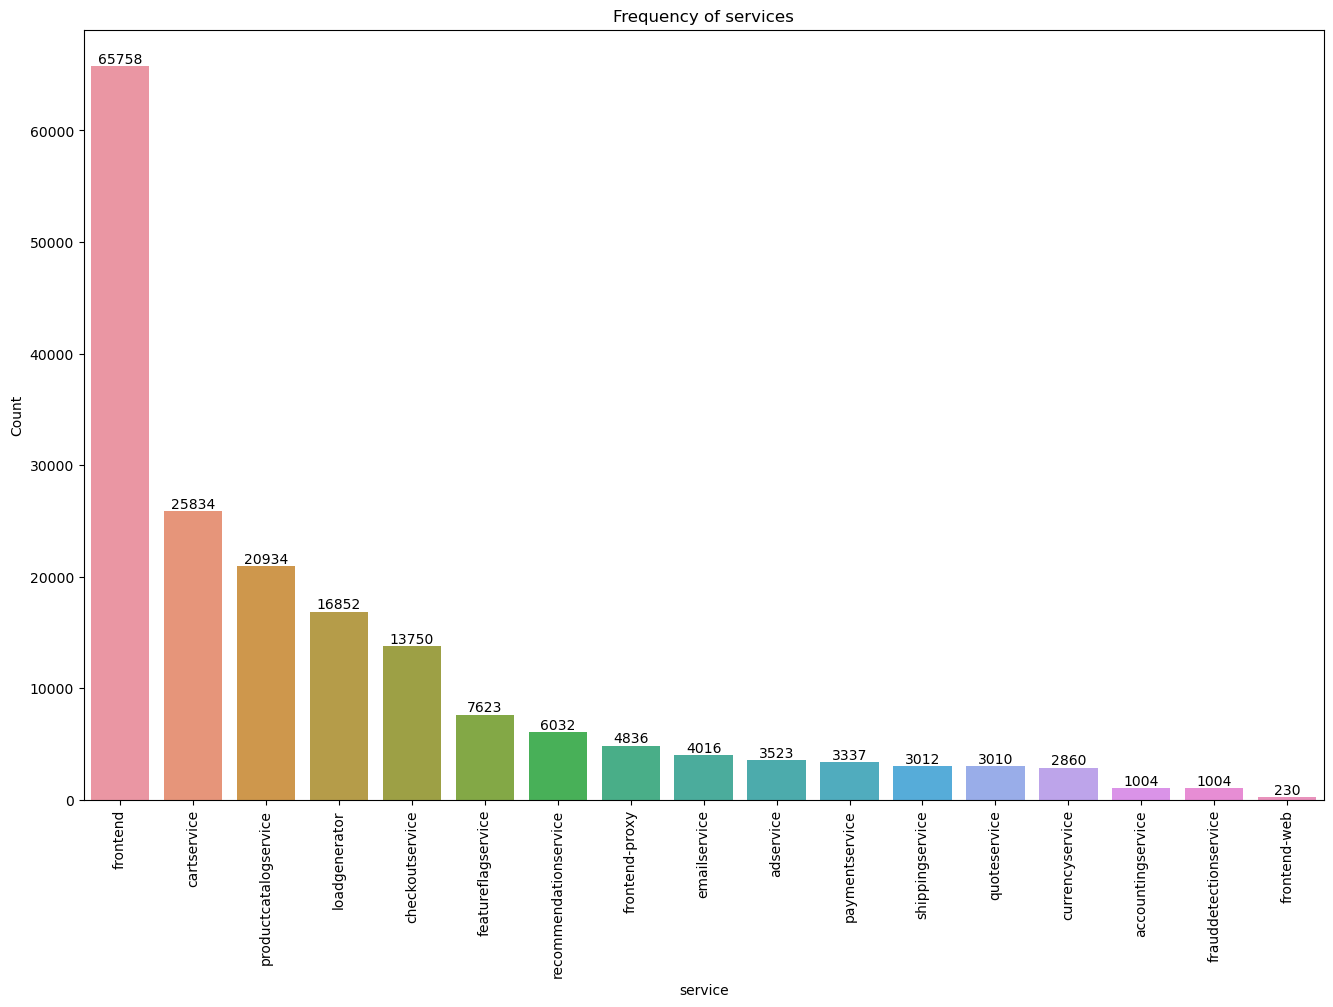

In [16]:
plt.figure(figsize=(16,10))
ax =sns.barplot(x=services.index,y=services.values)
plt.xticks(rotation=90)
ax.set(xlabel='service',ylabel='Count',title='Frequency of services')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [17]:
#Analysis of Name
set(df[' Name'])

{'/',
 '/featureflags',
 '/featureflags/:id',
 '/featureflags/:id/edit',
 '/oteldemo.FeatureFlagService/GetFlag',
 '/oteldemo.ProductCatalogService/ListProducts',
 '/oteldemo.RecommendationService/ListRecommendations',
 'CurrencyService/Convert',
 'CurrencyService/GetSupportedCurrencies',
 'EXPIRE',
 'HGET',
 'HMSET',
 'HTTP GET',
 'HTTP POST',
 'POST /getquote',
 'POST /send_order_confirmation',
 'calculate-quote',
 'charge',
 'click',
 'dns.lookup',
 'documentFetch',
 'documentLoad',
 'featureflagservice.repo.query',
 'featureflagservice.repo.query:featureflags',
 'fs existsSync',
 'fs open',
 'fs readFileSync',
 'fs readdirSync',
 'fs realpathSync',
 'fs stat',
 'fs statSync',
 'getAdsByCategory',
 'getRandomAds',
 'get_product_list',
 'grpc.oteldemo.AdService/GetAds',
 'grpc.oteldemo.CartService/AddItem',
 'grpc.oteldemo.CartService/GetCart',
 'grpc.oteldemo.CheckoutService/PlaceOrder',
 'grpc.oteldemo.CurrencyService/GetSupportedCurrencies',
 'grpc.oteldemo.PaymentService/Charge',

In [18]:
Names=df[' Name'].value_counts().head(5)

In [19]:
Names

HTTP GET                                          41311
oteldemo.ProductCatalogService/GetProduct         19453
grpc.oteldemo.ProductCatalogService/GetProduct    15741
HTTP POST                                         12938
HGET                                               8440
Name:  Name, dtype: int64

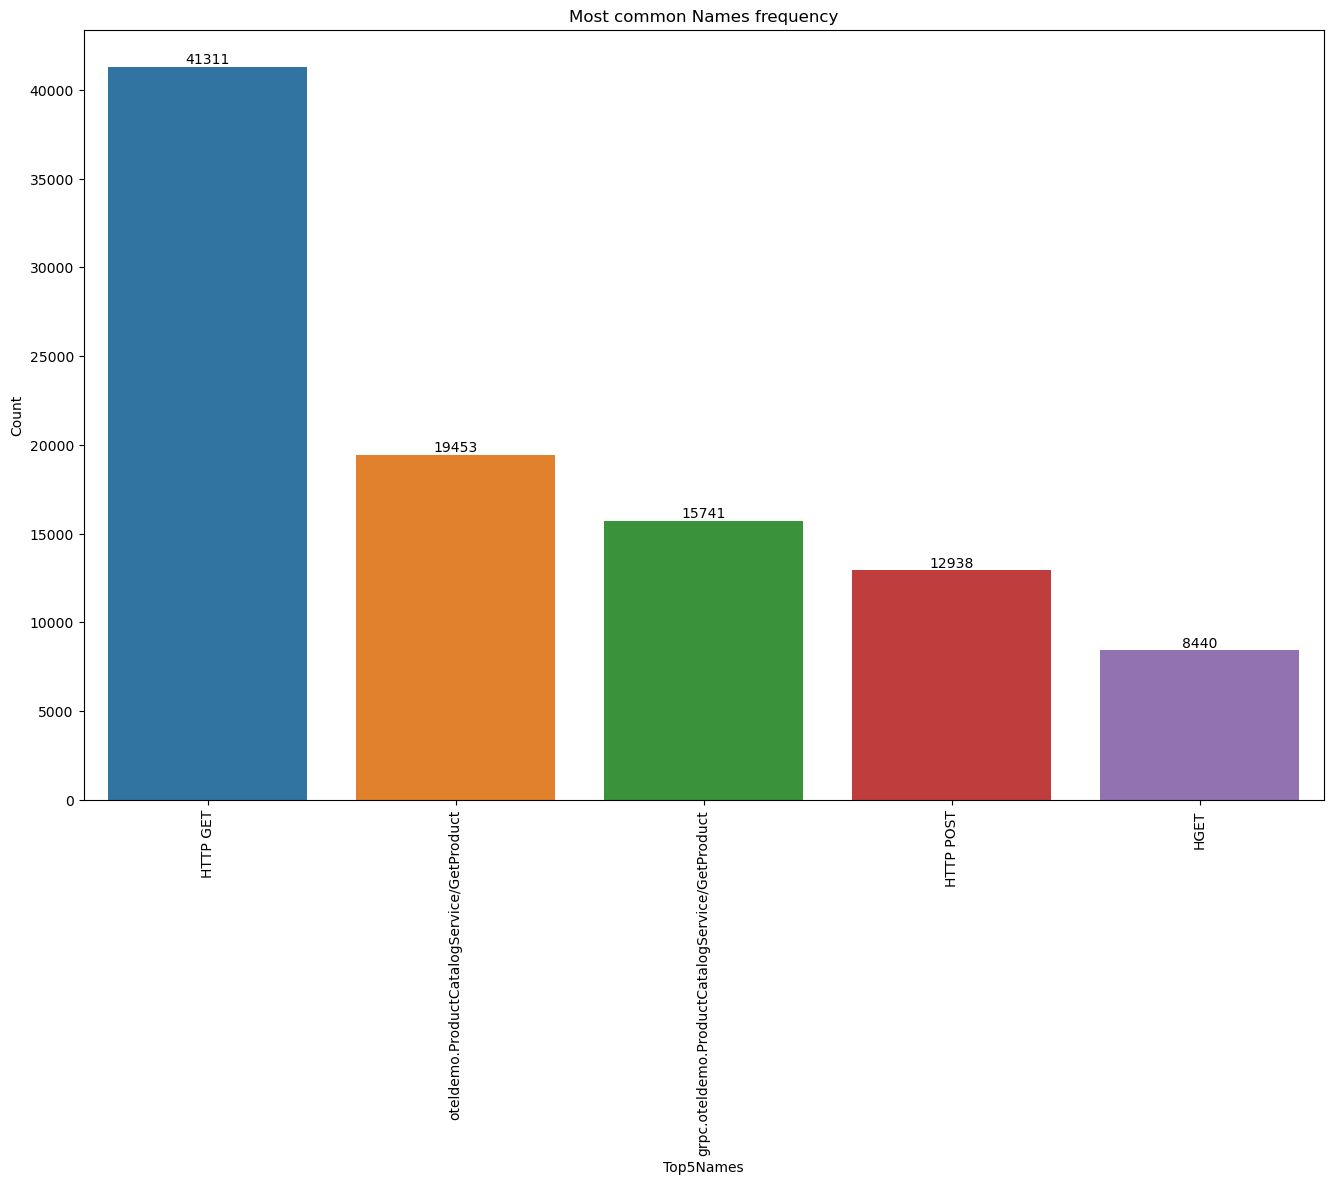

In [20]:
plt.figure(figsize=(16,10))
ax =sns.barplot(x=Names.index,y=Names.values)
plt.xticks(rotation=90)
ax.set(xlabel='Top5Names',ylabel='Count',title='Most common Names frequency')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [21]:
#traceid
traces =df [' traceID'].value_counts()

<Axes: >

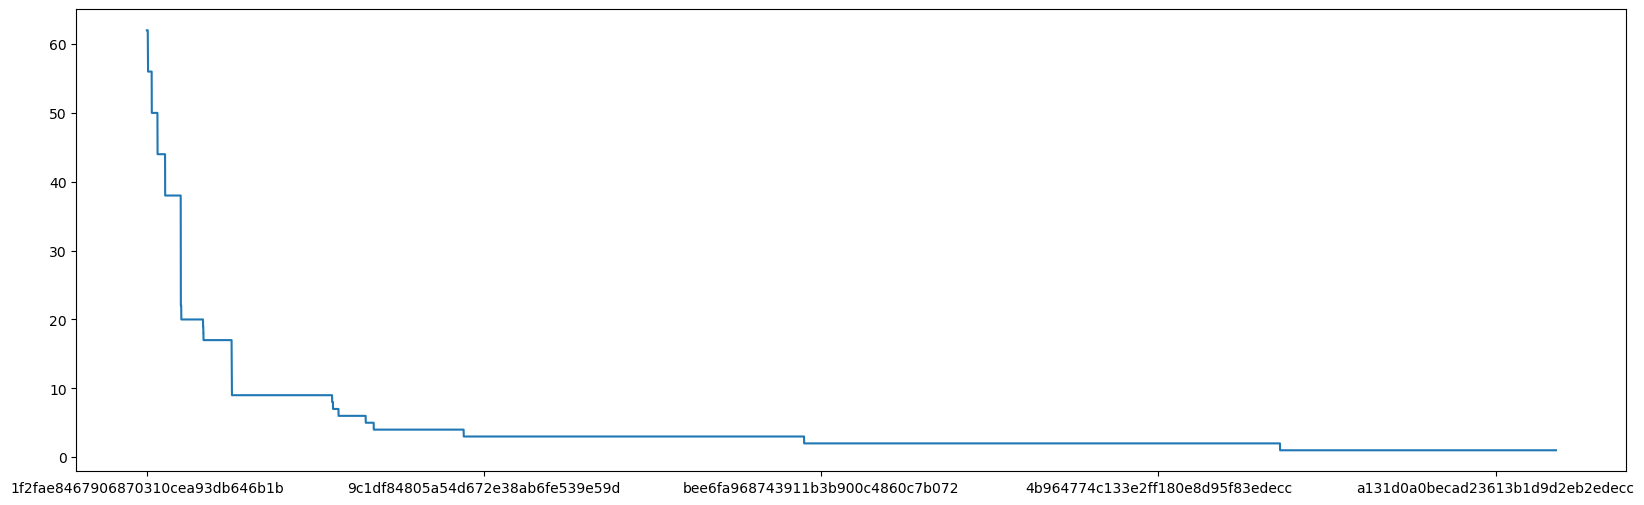

In [22]:
traces.plot(figsize=(20,6))# this shows the top 5 most common traces with there value coun

In [23]:
traces_to_keep=traces[traces>1].index

In [24]:
df1 = df[df[' traceID'].isin(traces_to_keep)] 

In [25]:
df1.info() # this shows that there are 175429 values wihich have traces in common with them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175429 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      175429 non-null  datetime64[ns]
 1    traceID       175429 non-null  object        
 2    spanID        175429 non-null  object        
 3    parentSpanID  175429 non-null  object        
 4    serviceName   175429 non-null  object        
 5    Name          175429 non-null  object        
 6    durationNano  175429 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 10.7+ MB


In [26]:
df1[' traceID'].nunique() # there are 33606 unique traces for spans

33606

In [27]:
df[' spanID'].value_counts()# this shows every span has unique id which is not common

0d87dcf5ea5aeaab    1
ed13885daefc12ba    1
cdcf63650f7f82c6    1
51b6a11a8d33f7ba    1
08ce7a85a111640d    1
                   ..
eab9b1d137205979    1
c8c5d5c5f1839549    1
24f249ed9461220e    1
ed7c8fa3c0227642    1
ae64d281880bfed7    1
Name:  spanID, Length: 183615, dtype: int64

In [28]:
df[' spanID'].nunique()

183615

In [29]:
#Analysis of parentSpanID
df[' parentSpanID'].nunique()

107233

<Axes: >

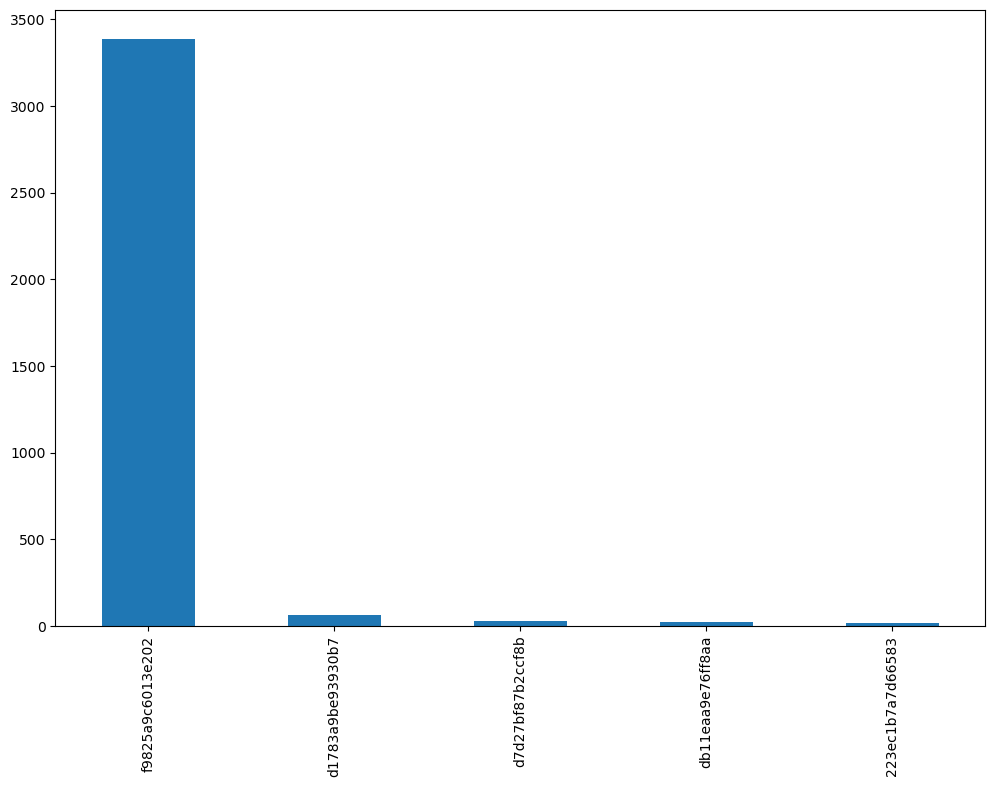

In [30]:
df[' parentSpanID'].value_counts().head(5).plot.bar(figsize=(12,8)) # most common parent id

In [31]:
df.head(50)

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,1900-01-01 00:42:32.700,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,0d87dcf5ea5aeaab,featureflagservice,/,887477
1,1900-01-01 00:42:32.700,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,1900-01-01 00:42:33.900,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,0d87dcf5ea5aeaab,frontend-proxy,ingress,213000
3,1900-01-01 00:42:36.900,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,0d87dcf5ea5aeaab,frontend-proxy,ingress,602000
4,1900-01-01 00:42:39.900,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,0d87dcf5ea5aeaab,frontend-proxy,ingress,556000
5,1900-01-01 00:42:42.900,f086ac82b8d7a9590cdd1b6abffed617,871279d818be6b34,0d87dcf5ea5aeaab,frontend-proxy,ingress,606000
6,1900-01-01 00:42:45.900,3a4688bac6c7275e22e98cea542bedaf,4d80902351506947,0d87dcf5ea5aeaab,frontend-proxy,ingress,615000
7,1900-01-01 00:42:48.900,c7dd2f62816aaa96577cb3a7906c9d6e,3ac29927bd1ba449,0d87dcf5ea5aeaab,frontend-proxy,ingress,560000
8,1900-01-01 00:42:51.900,28280ce792a326ae400364627a7e15f1,aab0792785736c86,0d87dcf5ea5aeaab,frontend-proxy,ingress,564000
9,1900-01-01 00:42:54.900,bb59d1aabf69143849c35934d22cc585,bb23c86be6b1f497,0d87dcf5ea5aeaab,frontend-proxy,ingress,544000


From the above observations we can draw some interesting conlusions about the parentspanid

Once the flag service is initiated spans are allocated for particular service until the initation of next flag service
Starting from the initation of the flad all the spans will contiue to have a. Same parentspanID b. Same serviceName c. Same Name
After the flag service is intiated one again spans are allocated to the next service

In [32]:
# insights about the duration column
# outlier detection
df[' durationNano'].describe()

count    1.836150e+05
mean     5.414918e+06
std      2.077879e+07
min      0.000000e+00
25%      3.357000e+05
50%      1.584906e+06
75%      6.832718e+06
max      4.999858e+09
Name:  durationNano, dtype: float64

In [33]:
Q1=3.357000e+05
Q3=6.832718e+06
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=df[(df[' durationNano']>upper_bound) | (df[' durationNano']<lower_bound)]

In [34]:
outliers #these outliers show there might be may parallel process going on at a praticular time stamp

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
3603,1900-01-01 00:34:57.900,0a4c8b2a204f67623bcfbda629a07fc5,e399d5dba0602199,f9825a9c6013e202,loadgenerator,HTTP GET,2980831627
3605,1900-01-01 00:34:58.900,605b2ed4e56586df16602ef85673fc83,2da5f946176ae936,f9825a9c6013e202,loadgenerator,HTTP GET,1980473681
3606,1900-01-01 00:34:59.300,86d69278c14a4670bb1be847e7ea5184,af231ec03fdf53f2,f9825a9c6013e202,loadgenerator,HTTP GET,1556061636
3607,1900-01-01 00:34:59.900,7ccb42abf04c59bcf42ae9b992bcbbf9,84a19b54e2061b6e,f9825a9c6013e202,loadgenerator,HTTP GET,984197491
3609,1900-01-01 00:35:00.900,3aeebc9a1f17e194d78f04d14977e58f,b620acf9768c3cd4,4bc79362e98a10a3,loadgenerator,HTTP GET,17417895
...,...,...,...,...,...,...,...
183570,1900-01-01 00:44:50.600,874439d0e71fc74d17793c547998044c,dddd322b38ef9c1d,94f4f595005cd4a0,loadgenerator,HTTP POST,20885994
183571,1900-01-01 00:44:50.600,874439d0e71fc74d17793c547998044c,c554a8beba0d3053,dddd322b38ef9c1d,frontend,HTTP POST,19646976
183573,1900-01-01 00:44:50.600,d39c8d5c2028c57812ba31c2f2093b81,322a109a4f8c2b8f,322a109a4f8c2b8f,frontend,HTTP POST,17287424
183595,1900-01-01 00:44:51.000,4d45a4d63d5ec0498c01d532d077ef21,efa40483424b6f3d,4de4446b83ae7a3c,loadgenerator,HTTP GET,19160113


In [35]:
pivot_accountingservice = df.query('` serviceName` == "accountingservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)

pivot_accountingservice.head(50)

,,Name,orders receive,All
spanID,parentSpanID,traceID,,
All,,,22438949,22438949
eb01248ab70fb459,e0e885cfcb08c0af,ea6e9033d4114ae998e40b4d405d2a19,427800,427800
a45179c23c51823e,463c9aa3980f948b,8ec0f2fdd848f71d421918292a177560,164311,164311
3dc4e8ac07dcdae6,2c1e3321ef326b62,3d2d9721d216a55acc12fc46d3b39f9b,155722,155722
c51eb34f37c07d01,f8638691de58f1ad,5344a21fcab0a9af3a05554795d158ca,132717,132717
10c01dca3ee8415e,ba6e0ce06da4b837,1b4b603565aa037d55803656c8c2fdf1,119497,119497
d671c920eb60310d,cefd3cd244ad9061,01f8ebe2be634b023c949b06350aff6f,74402,74402
07a0184fdc388cd1,3b3e27b9c839be85,ca3fa94f53e3221828259763a8da3ba6,73612,73612
954f8ec6d2451292,bd060bf16a6dbcc9,7d31b423e6076a23b4bc405f9d13ed9f,71633,71633


In [36]:
pivot_accountingservice= pivot_accountingservice.drop('All')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2479771868.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pivot_accountingservice= pivot_accountingservice.drop('All')


In [37]:
pivot_accountingservice=pivot_accountingservice.drop('All',axis=1)

In [38]:
pivot_accountingservice.info() # here we can see that for the given service there are 1004 id associated and orders service is the name used

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1004 entries, ('eb01248ab70fb459', 'e0e885cfcb08c0af', 'ea6e9033d4114ae998e40b4d405d2a19') to ('254c775441394fb7', 'ca29c07c273cd99f', '494bf2601efa5d0cb7342dc13de52b28')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   orders receive  1004 non-null   int64
dtypes: int64(1)
memory usage: 134.3+ KB


In [39]:
pivot_accountingservice.describe()

Name,orders receive
count,1004.000000
mean,22349.550797
std,18200.050469
min,9712.000000
25%,13358.000000
50%,20643.500000
75%,24390.000000
max,427800.000000


In [40]:
Q1=13358.00
Q3=24390.000
 

IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=pivot_accountingservice[(pivot_accountingservice['orders receive']>upper_bound) | (pivot_accountingservice['orders receive']<lower_bound)]
    

In [41]:
outliers

,,Name,orders receive
spanID,parentSpanID,traceID,
eb01248ab70fb459,e0e885cfcb08c0af,ea6e9033d4114ae998e40b4d405d2a19,427800
a45179c23c51823e,463c9aa3980f948b,8ec0f2fdd848f71d421918292a177560,164311
3dc4e8ac07dcdae6,2c1e3321ef326b62,3d2d9721d216a55acc12fc46d3b39f9b,155722
c51eb34f37c07d01,f8638691de58f1ad,5344a21fcab0a9af3a05554795d158ca,132717
10c01dca3ee8415e,ba6e0ce06da4b837,1b4b603565aa037d55803656c8c2fdf1,119497
...,...,...,...
4a27120486679bd0,cfbb836fdf8d4bfe,7b73e568f42a2238c3bb5299033d5a69,42268
c18216aac8c810a2,089ee9267da3b745,2e14e1638d28b0c1984ef276ed0febf0,42259
e4c319eafb3d70ab,21ef6fe5a61085f6,27c021cd04d335c295ea356d0606b12e,41732


<Axes: ylabel='Frequency'>

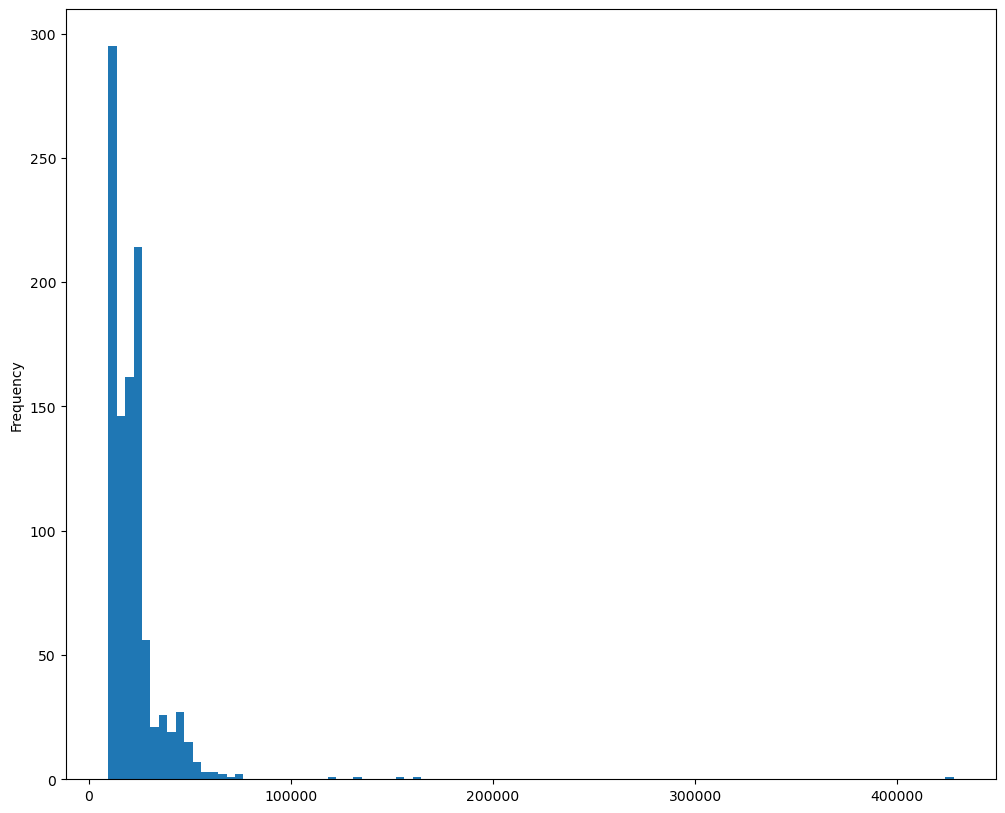

In [42]:
pivot_accountingservice['orders receive'].plot.hist(bins=100,figsize=(12,10))

In [43]:
adservice = df.query('` serviceName` == "adservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)

adservice.head(50)

,,Name,getAdsByCategory,getRandomAds,oteldemo.AdService/GetAds,oteldemo.FeatureFlagService/GetFlag,All
spanID,parentSpanID,traceID,,,,,
All,,,44343427.0,45627008.0,3.334165e+09,1.506540e+09,4930674931
0554873d31ba9fde,8103ebd7e8506e7c,1ee06ff4d796d1be3dd909e9575cc17a,NaN,NaN,8.935827e+07,NaN,89358273
b5f05bc6c1513944,0554873d31ba9fde,1ee06ff4d796d1be3dd909e9575cc17a,NaN,NaN,NaN,7.926914e+07,79269142
b51318b6ad4ba3f8,2dab9943197c1151,1664a8b9cc421ca2103fab949c2e8c80,NaN,NaN,4.270092e+07,NaN,42700924
f82b75f4e3d03d54,c1b342e70f55de4e,3e539a06d98c0b3f5b8ac978e9ccbed7,NaN,NaN,2.026207e+07,NaN,20262069
e1ce63dfe85c2485,d330a0023c478458,d09655bb79bf1c7111336770c302c757,NaN,NaN,1.899210e+07,NaN,18992096
bdcb3c7e8f05664e,f82b75f4e3d03d54,3e539a06d98c0b3f5b8ac978e9ccbed7,NaN,NaN,NaN,1.754103e+07,17541033
d90a74031804e408,e1ce63dfe85c2485,d09655bb79bf1c7111336770c302c757,NaN,NaN,NaN,1.668517e+07,16685171
8b8674bd8810836d,df8b9c003775fa73,b0404757f9685e240ed2ba8fd1388c4d,NaN,NaN,1.611269e+07,NaN,16112686


In [44]:
adservice= adservice.drop('All')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\1729010810.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  adservice= adservice.drop('All')


In [45]:
adservice=adservice.drop('All',axis=1)

In [46]:
adservice.describe()

Name,getAdsByCategory,getRandomAds,oteldemo.AdService/GetAds,oteldemo.FeatureFlagService/GetFlag
count,1349.000000,4.380000e+02,1.552000e+03,1.840000e+02
mean,32871.332098,1.041713e+05,2.148302e+06,8.187715e+06
std,37747.213727,5.177320e+05,3.701373e+06,5.693217e+06
min,3814.000000,1.356700e+04,2.816830e+05,4.722243e+06
25%,17399.000000,4.908175e+04,7.095575e+05,6.315944e+06
50%,24631.000000,7.077050e+04,1.067570e+06,7.525975e+06
75%,37623.000000,9.186200e+04,1.678726e+06,8.487508e+06
max,751051.000000,1.087039e+07,8.935827e+07,7.926914e+07


In [47]:
Q1=17399.00
Q3=37623.00
 

IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=adservice[(adservice['getAdsByCategory']>upper_bound) | (adservice['getAdsByCategory']<lower_bound)]
outliers
    

,,Name,getAdsByCategory,getRandomAds,oteldemo.AdService/GetAds,oteldemo.FeatureFlagService/GetFlag
spanID,parentSpanID,traceID,,,,
17d4c13340ce8154,86593b2f1ce9b0aa,ab685a72bbf7f68ac3dc5fb46cb3f467,751051.0,NaN,NaN,NaN
14ee670944e366ad,465734354744a8f7,beb6c0593c9c0b9bc7ea1a8b6689173b,598711.0,NaN,NaN,NaN
70144351c728afbf,b51318b6ad4ba3f8,1664a8b9cc421ca2103fab949c2e8c80,480574.0,NaN,NaN,NaN
3ee3fdc8ac2504e1,2623350abfcc8028,6655ebafa0e81674b996d8fe53bf6e95,273204.0,NaN,NaN,NaN
7533ac169d6b51cb,d69417e2b7d66c73,a7b0b4e798de6924c12b15fca38ed7f4,271459.0,NaN,NaN,NaN
...,...,...,...,...,...,...
e5162b92512012bb,3046b3fcf52869ec,1e16fe05f60aa87ea49eda99f499b54c,69089.0,NaN,NaN,NaN
e1a8eaba50cb8ed8,9a06799acdab7791,239b6b46d5f48e34d859685c01661619,68619.0,NaN,NaN,NaN
0d33b22090c2c139,cb5b0ea39b41fcd6,eeb4d9442bb92f7d183a3853d1fc9154,68422.0,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

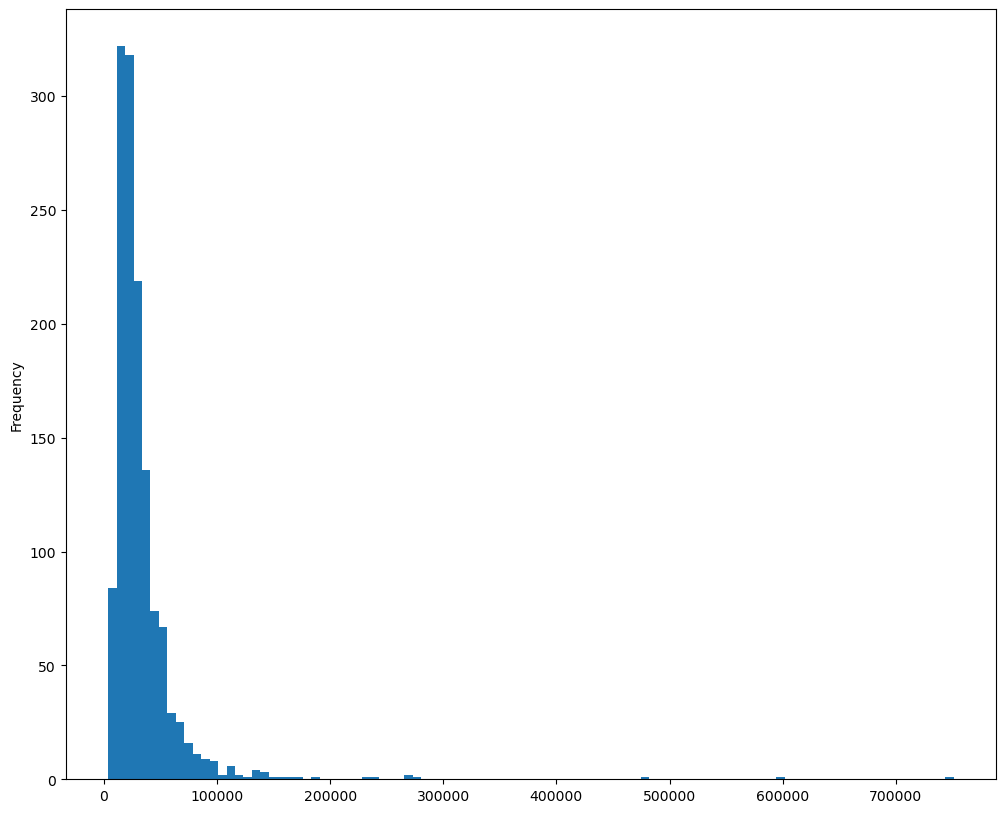

In [48]:
adservice['getAdsByCategory'].plot.hist(bins=100,figsize=(12,10))

In [49]:
Q1=4.908175e+04	
Q3=9.186200e+04	
 

IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=adservice[(adservice['getRandomAds']>upper_bound) | (adservice['getRandomAds']<lower_bound)]
outliers
    

,,Name,getAdsByCategory,getRandomAds,oteldemo.AdService/GetAds,oteldemo.FeatureFlagService/GetFlag
spanID,parentSpanID,traceID,,,,
4b1e111da7358335,f51303214968b779,f33463643d46911cca09a008a4fd08a7,NaN,10870389.0,NaN,NaN
678bde74f6e4a368,2861163eadc668d7,3388562393b5908c8a3a8a546a3222e7,NaN,376897.0,NaN,NaN
2a048a2d10dbc42c,a9915f86de3ff246,efb0e90701fff2a75658c1700cc746b6,NaN,295041.0,NaN,NaN
9733b1dc2cbf8c8d,5de7f3498810786f,d7e56214f54800e532329821bc5d18f6,NaN,275632.0,NaN,NaN
0fffb611e5781818,089a96cfc2351e1d,78ba1a9c0a19395377e8ce0a9d592dc1,NaN,274312.0,NaN,NaN
392f7038b3d44387,5d8546e1b19a6afa,0bbff44afaf9fc7f7c2b051ac395b48a,NaN,270224.0,NaN,NaN
2f57dc7e265cc166,cfcb4c800025f40e,10503ca7676729ee0b15bef84ee06245,NaN,262928.0,NaN,NaN
e08de1e8597cbbc8,f25be688aa4d3cff,39baa2ab3725520f42e8309848b1647a,NaN,246897.0,NaN,NaN
ec5950d067ae410f,ae5e2b7fa8859f68,76f14b2df4c152105b155db215e0e974,NaN,220550.0,NaN,NaN


<Axes: ylabel='Frequency'>

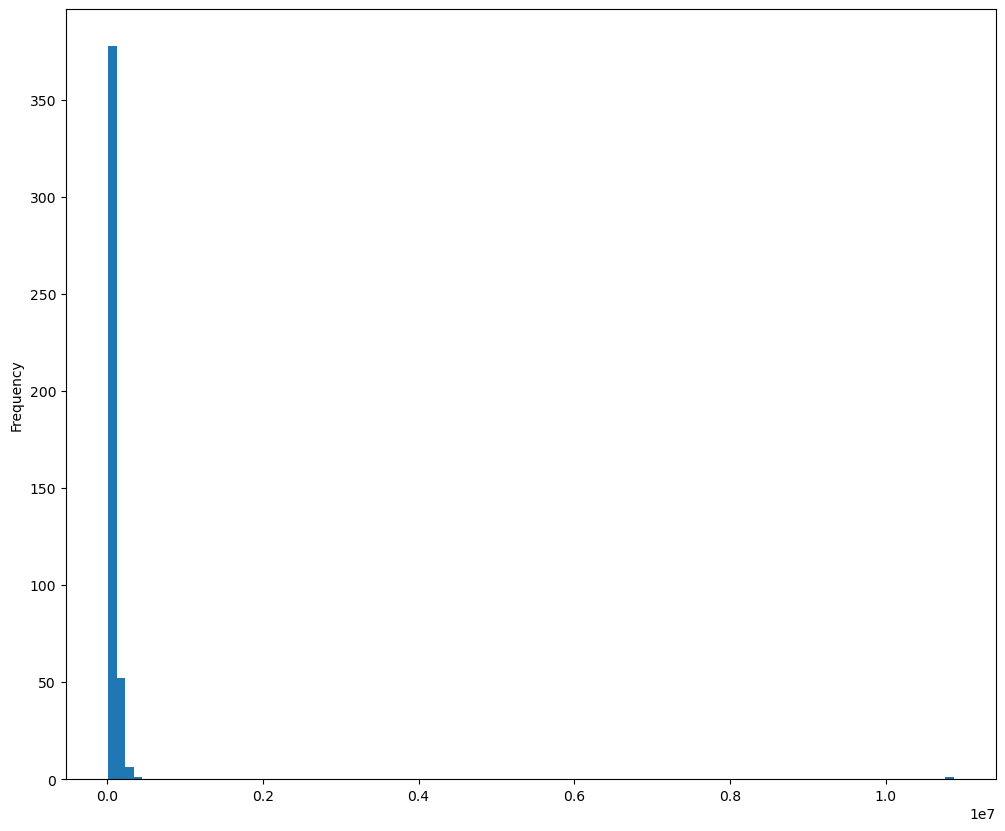

In [50]:
adservice['getRandomAds'].plot.hist(bins=100,figsize=(12,10))

In [51]:
Q1=7.095575e+05	
Q3=1.678726e+06	
 

IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=adservice[(adservice['oteldemo.AdService/GetAds']>upper_bound) | (adservice['oteldemo.AdService/GetAds']<lower_bound)]

outliers

,,Name,getAdsByCategory,getRandomAds,oteldemo.AdService/GetAds,oteldemo.FeatureFlagService/GetFlag
spanID,parentSpanID,traceID,,,,
0554873d31ba9fde,8103ebd7e8506e7c,1ee06ff4d796d1be3dd909e9575cc17a,NaN,NaN,89358273.0,NaN
b51318b6ad4ba3f8,2dab9943197c1151,1664a8b9cc421ca2103fab949c2e8c80,NaN,NaN,42700924.0,NaN
f82b75f4e3d03d54,c1b342e70f55de4e,3e539a06d98c0b3f5b8ac978e9ccbed7,NaN,NaN,20262069.0,NaN
e1ce63dfe85c2485,d330a0023c478458,d09655bb79bf1c7111336770c302c757,NaN,NaN,18992096.0,NaN
8b8674bd8810836d,df8b9c003775fa73,b0404757f9685e240ed2ba8fd1388c4d,NaN,NaN,16112686.0,NaN
...,...,...,...,...,...,...
a5d1510ed3df7fd9,1d48ea8035be1594,291986b551bfb9c3bfb6c18ee2ee4419,NaN,NaN,3280852.0,NaN
2623350abfcc8028,a36e1e926bbb2b36,6655ebafa0e81674b996d8fe53bf6e95,NaN,NaN,3258799.0,NaN
d9b475a36e2452c2,3f367cac01fca981,a5b95c846c535c919730eabdfe4d560a,NaN,NaN,3255327.0,NaN


<Axes: ylabel='Frequency'>

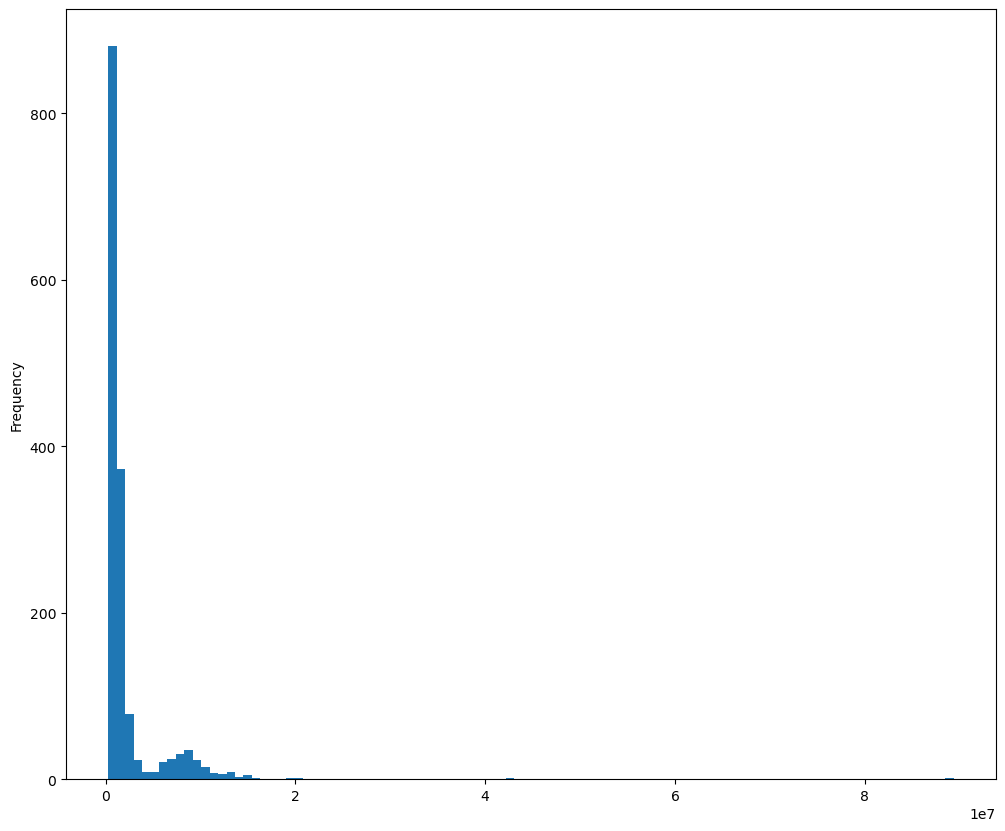

In [52]:
adservice['oteldemo.AdService/GetAds'].plot.hist(bins=100,figsize=(12,10))

In [53]:
Q1=6.315944e+06
Q3=8.487508e+06
 

IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=adservice[(adservice['oteldemo.FeatureFlagService/GetFlag']>upper_bound) | (adservice['oteldemo.FeatureFlagService/GetFlag']<lower_bound)]

outliers

,,Name,getAdsByCategory,getRandomAds,oteldemo.AdService/GetAds,oteldemo.FeatureFlagService/GetFlag
spanID,parentSpanID,traceID,,,,
b5f05bc6c1513944,0554873d31ba9fde,1ee06ff4d796d1be3dd909e9575cc17a,NaN,NaN,NaN,79269142.0
bdcb3c7e8f05664e,f82b75f4e3d03d54,3e539a06d98c0b3f5b8ac978e9ccbed7,NaN,NaN,NaN,17541033.0
d90a74031804e408,e1ce63dfe85c2485,d09655bb79bf1c7111336770c302c757,NaN,NaN,NaN,16685171.0
69514797a6163b95,8b8674bd8810836d,b0404757f9685e240ed2ba8fd1388c4d,NaN,NaN,NaN,14342905.0
42aadcf74d1743ad,9c33298e0e4a884a,014ebd422643fdc6c38297c94b482b5d,NaN,NaN,NaN,13422444.0
cb3dfb42f3e1779f,98241405a25a4f09,d093efdbaba1c989235530b06daaf9ca,NaN,NaN,NaN,13318376.0
bab34472789e35ef,b9a18418695ea279,eb412322a4d62db9b0357bff793c34db,NaN,NaN,NaN,13084459.0
8d28a0c3c9685006,cc66488f9307dcad,54e1086eb5ace8d37bfaaf356df18347,NaN,NaN,NaN,12907386.0
c4f356c60aef923d,fd5c1a6cc266d0b3,06961b6a928fa47af29bcecd2715788e,NaN,NaN,NaN,12881626.0


<Axes: ylabel='Frequency'>

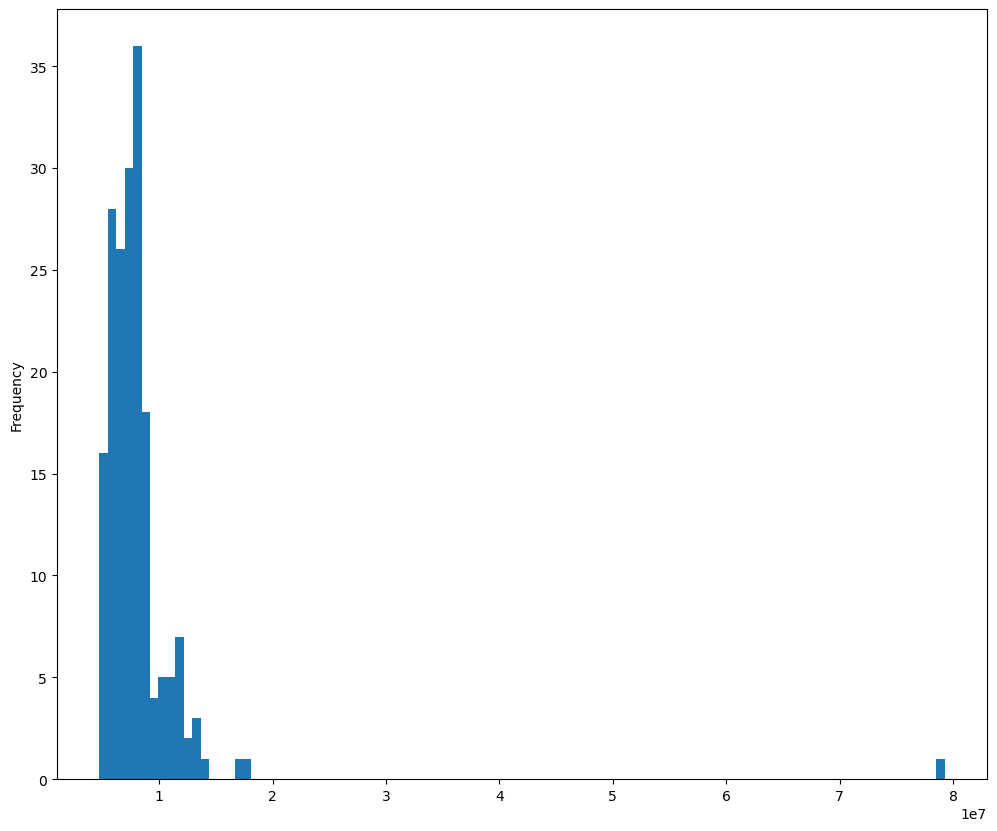

In [54]:
adservice['oteldemo.FeatureFlagService/GetFlag'].plot.hist(bins=100,figsize=(12,10))

In [55]:
set(df[' serviceName'])

{'accountingservice',
 'adservice',
 'cartservice',
 'checkoutservice',
 'currencyservice',
 'emailservice',
 'featureflagservice',
 'frauddetectionservice',
 'frontend',
 'frontend-proxy',
 'frontend-web',
 'loadgenerator',
 'paymentservice',
 'productcatalogservice',
 'quoteservice',
 'recommendationservice',
 'shippingservice'}

In [56]:
cartservice= df.query('` serviceName` == "cartservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)

cartservice

,,Name,EXPIRE,HGET,HMSET,oteldemo.CartService/AddItem,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,All
spanID,parentSpanID,traceID,,,,,,,
All,,,1.211141e+09,4.430298e+09,1.508529e+09,5.076226e+09,599795500.0,4.262886e+09,17088875800
46b4de50d981ae91,f08b599f4404f571,16c070da17b050d6332fd2640c24d451,NaN,NaN,NaN,1.092733e+08,NaN,NaN,109273300
c76943138bacc636,4a7099bb9c7e2610,59e790c142b927844993b2a5de3c1faa,NaN,NaN,NaN,1.520930e+07,NaN,NaN,15209300
fbbc1f18f6d2ee40,2e1c2abb37a9b436,c61b9335e55c9f13715962a402f1712d,NaN,NaN,NaN,1.518710e+07,NaN,NaN,15187100
15a1282c1569e8b7,fbbc1f18f6d2ee40,c61b9335e55c9f13715962a402f1712d,NaN,1.180080e+07,NaN,NaN,NaN,NaN,11800800
...,...,...,...,...,...,...,...,...,...
34a737e01e9a842a,458535e7d66b673b,0aa1eb760ea52d5c2c6f8c508a120d51,1.234000e+05,NaN,NaN,NaN,NaN,NaN,123400
8e38f577fddd9ebe,24c4906ece75d1ed,24d95aada556f9bafe97d4fe2624e0fb,1.226000e+05,NaN,NaN,NaN,NaN,NaN,122600
8e0dfe45a221c510,6cda847cd3d88560,619f59c0852d24879f5d3cf7b3bf1f53,1.224000e+05,NaN,NaN,NaN,NaN,NaN,122400


In [57]:
cartservice=cartservice.drop('All')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\1722251987.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cartservice=cartservice.drop('All')


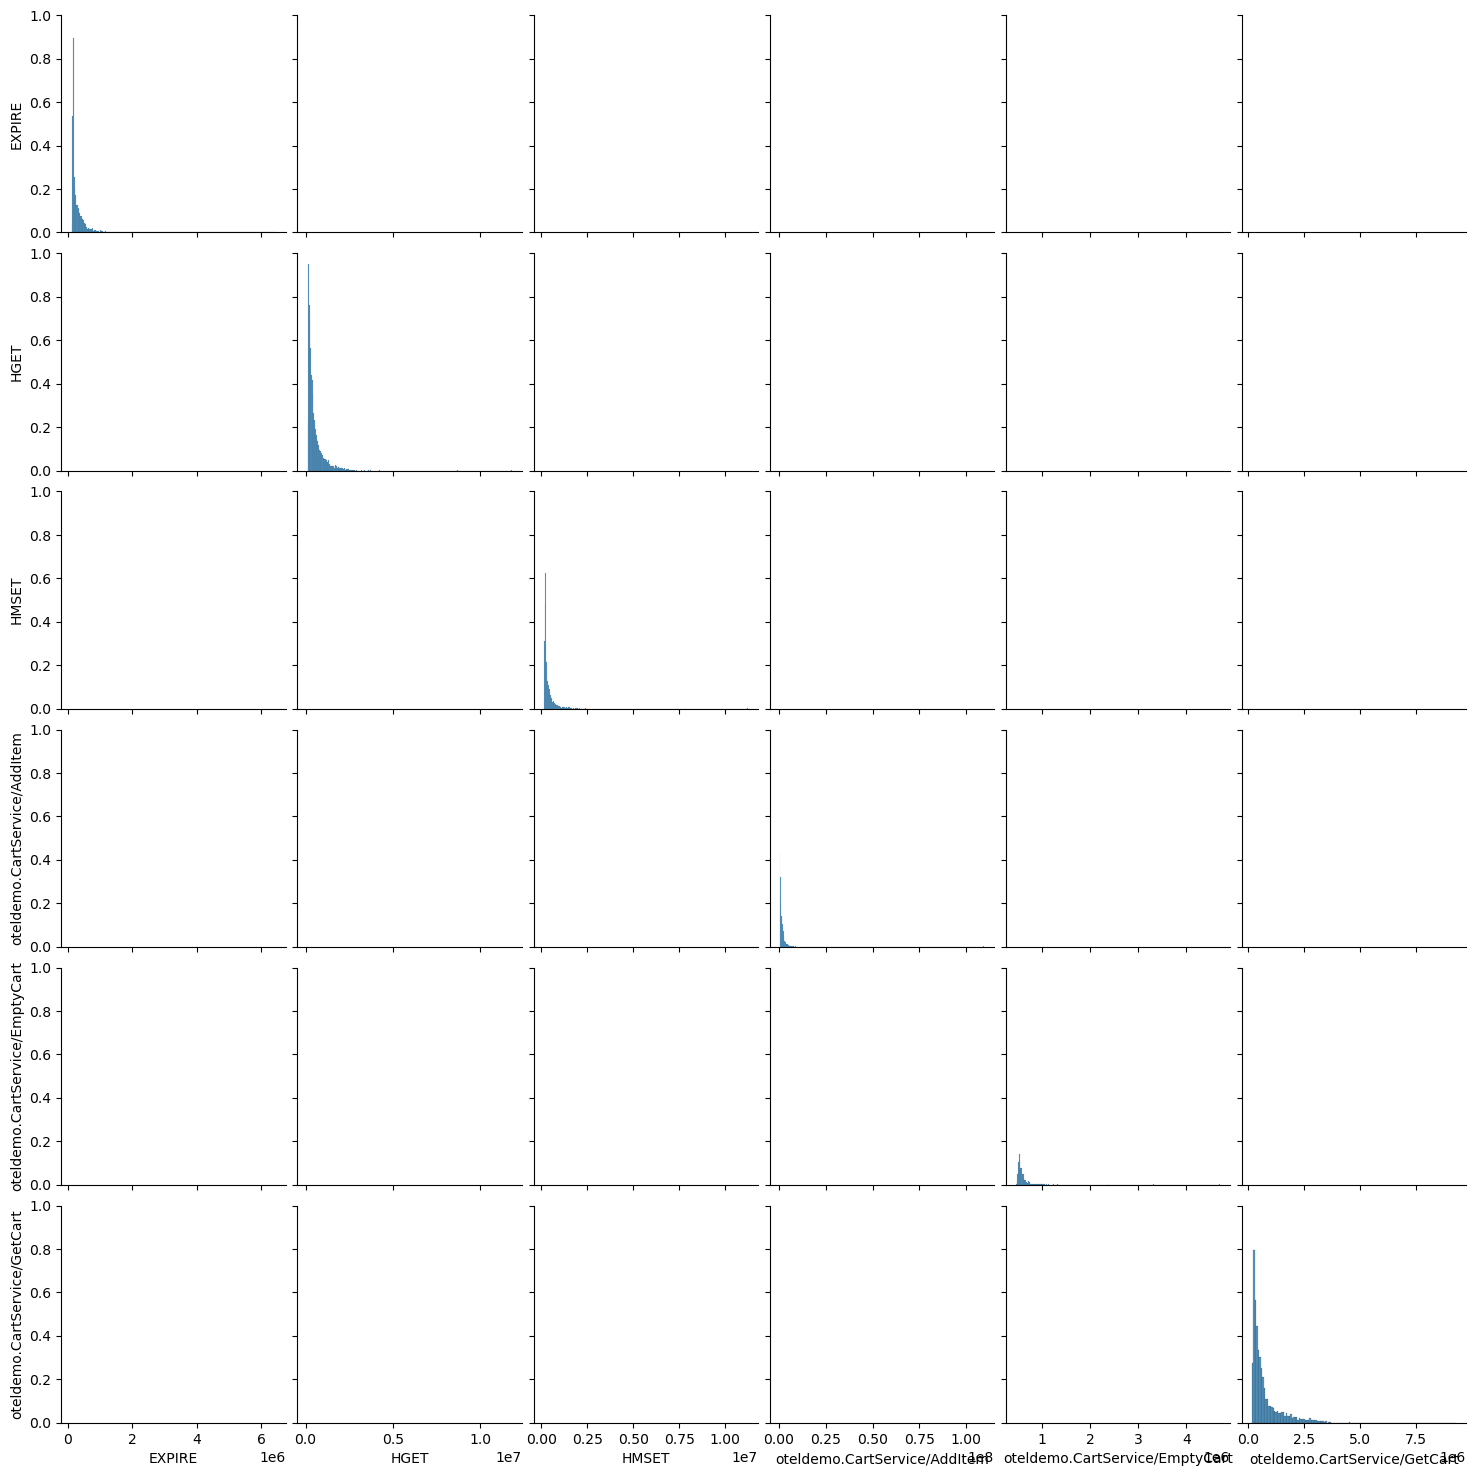

In [60]:
sns.pairplot(cartservice,kind='hist')

In [61]:
cartservice=cartservice.drop('All',axis=1)

KeyError: "['All'] not found in axis"

In [ ]:
cartservice.describe()

In [ ]:
Q1=1.638000e+05	
Q3=3.534000e+05
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=cartservice[(cartservice['EXPIRE']>upper_bound) | (cartservice['EXPIRE']<lower_bound)]

outliers

In [ ]:
#outliers of HGET
Q1=	2.329000e+05
Q3=6.352250e+05
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=cartservice[(cartservice['HGET']>upper_bound) | (cartservice['HGET']<lower_bound)]

outliers # 684 outliers showing the paralle process 

In [ ]:
#outliers of HGET
Q1=	2.066500e+05
Q3=	4.193500e+05
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=cartservice[(cartservice['HMSET']>upper_bound) | (cartservice['HMSET']<lower_bound)]

outliers #375 rows are outliers

In [63]:
#outliers of additem
Q1=	8.751500e+05
Q3=2.051950e+06	
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=cartservice[(cartservice['oteldemo.CartService/AddItem']>upper_bound) | (cartservice['oteldemo.CartService/AddItem']<lower_bound)]

outliers #180 rows are outliers

,,Name,EXPIRE,HGET,HMSET,oteldemo.CartService/AddItem,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart
spanID,parentSpanID,traceID,,,,,,
46b4de50d981ae91,f08b599f4404f571,16c070da17b050d6332fd2640c24d451,NaN,NaN,NaN,109273300.0,NaN,NaN
c76943138bacc636,4a7099bb9c7e2610,59e790c142b927844993b2a5de3c1faa,NaN,NaN,NaN,15209300.0,NaN,NaN
fbbc1f18f6d2ee40,2e1c2abb37a9b436,c61b9335e55c9f13715962a402f1712d,NaN,NaN,NaN,15187100.0,NaN,NaN
3ec213620c2b3e91,4cadb652400f03a4,de9cbbf10823ac59bb482adbde8498db,NaN,NaN,NaN,9020500.0,NaN,NaN
cd10a2ba838e3bc6,ce3f9b95fe62b10a,916ac66dfc535bcab187a7b9b53b35f1,NaN,NaN,NaN,8094500.0,NaN,NaN
...,...,...,...,...,...,...,...,...
fa4064ba1e1bcb2d,22b6a25bd1690949,ceaca4ee24cadba858336f6457207657,NaN,NaN,NaN,3848200.0,NaN,NaN
a9e94fa461c0d2c1,fd395ab802887344,7103f20e49c47521fcc747885da031d1,NaN,NaN,NaN,3846800.0,NaN,NaN
e49c9ca23d336e69,509cc603c300d9be,5e74c4c0e35c0c931db2bb414c90c964,NaN,NaN,NaN,3829000.0,NaN,NaN


In [65]:
#outliers of emptitem
Q1=	5.306500e+05
Q3=	6.094500e+05
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=cartservice[(cartservice['oteldemo.CartService/EmptyCart']>upper_bound) | (cartservice['oteldemo.CartService/EmptyCart']<lower_bound)]

outliers #180 rows are outliers

,,Name,EXPIRE,HGET,HMSET,oteldemo.CartService/AddItem,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart
spanID,parentSpanID,traceID,,,,,,
e749ed7a4ebd47c9,4a404d41a49bea40,f88b1b6363eba3b07b1ee5c0883dcd21,NaN,NaN,NaN,NaN,4696500.0,NaN
fde2d5fcd7c2a83b,6a579f0646450a7b,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,NaN,NaN,3316400.0,NaN
18368898bb119ff1,645a3460452d3fdb,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,2376300.0,NaN
da2a910625bff7c8,c9d52a037b61e952,d916d4751d7e2fe20c6a2b90f6307bce,NaN,NaN,NaN,NaN,1333300.0,NaN
f84f222b03f8a715,31379f9ab74a06af,edec4079caea20a049ea08ddddfbccbd,NaN,NaN,NaN,NaN,1323200.0,NaN
...,...,...,...,...,...,...,...,...
aa74d483a3b50324,433fc72d5a317687,f2645304ce32efb0ab94792ff4356523,NaN,NaN,NaN,NaN,729500.0,NaN
86dd75c94351cafa,4beefae89f0b8303,0ebd3f3947f594e4926fc3b658ddf31a,NaN,NaN,NaN,NaN,729400.0,NaN
820dc2b37cf5b753,e473cadd4948d527,d104e5f068bbc062a40d7e3b6a87db4c,NaN,NaN,NaN,NaN,729200.0,NaN


In [66]:
#outliers of getcart
Q1=3.342000e+05
Q3=	9.134000e+05
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=cartservice[(cartservice['oteldemo.CartService/GetCart']>upper_bound) | (cartservice['oteldemo.CartService/GetCart']<lower_bound)]

outliers #180 rows are outliers

,,Name,EXPIRE,HGET,HMSET,oteldemo.CartService/AddItem,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart
spanID,parentSpanID,traceID,,,,,,
382e310469e14193,fd1e6e4b5912cc75,16c070da17b050d6332fd2640c24d451,NaN,NaN,NaN,NaN,NaN,9306600.0
9f144927fc3ebbd2,4d51e386aeab976e,e94b8a39db2c7e5773514e82724c0db4,NaN,NaN,NaN,NaN,NaN,9165400.0
155ca8a7e9b3086f,910090fc0bae0550,2dc347292d127daeddefcfba32a39784,NaN,NaN,NaN,NaN,NaN,4642600.0
6631064d2c608030,6263224224f49475,e51fa79b795d8d03dfa8ea87fc8798b4,NaN,NaN,NaN,NaN,NaN,4573200.0
069458e29bcce0de,d8931c6fa1a13d5d,3abd8dde46affab538f8e489d7b68d53,NaN,NaN,NaN,NaN,NaN,4537200.0
...,...,...,...,...,...,...,...,...
8ca390657b430830,f011efad1f730895,f663fa60e352868f837ea72ca5fb418b,NaN,NaN,NaN,NaN,NaN,1790900.0
64fa9b65c595dc16,b3b92a2ef6bfe2e1,1e34e047fff593d2911048e1358698b6,NaN,NaN,NaN,NaN,NaN,1789700.0
317ba0187cb1d175,aaa69c8a8131da52,90cd4c106bbad072ed6c7e2c02c6df08,NaN,NaN,NaN,NaN,NaN,1788500.0


In [67]:
#checkoutservice
checkoutservice=df.query('` serviceName` == "checkoutservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
checkoutservice

,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart,All
spanID,parentSpanID,traceID,,,,,,,,,,,,
All,,,2.807723e+09,635783447.0,1.514785e+09,1.635524e+09,2.180455e+10,5.886823e+09,1.697396e+09,2.680905e+09,3.051539e+09,792699761.0,1.387147e+10,56379201516
a29cae2f4af0f8a3,8d2a4e8887dec518,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,NaN,NaN,1.893687e+08,NaN,NaN,NaN,NaN,NaN,NaN,189368676
c80a3fe501189596,c2d419cbad97b81e,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,1.172445e+08,NaN,NaN,NaN,NaN,NaN,NaN,117244496
c9f4e79b7a0259a7,a29cae2f4af0f8a3,008776a03a8dc10b4fd67aeb86fd7fe7,1.145589e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114558878
8b44db41be2045fd,c80a3fe501189596,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.557363e+07,95573634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596e5c6e32f4163,169a4bcb837a991e,b12f2b6b12aaaa9f3e30f13b06ecea54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.781780e+05,NaN,NaN,NaN,178178
8ab8e163e14dbbf0,cf922455228b7fa0,c8c8f0c03972eb221dcffbd82b45d61f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.742450e+05,NaN,NaN,NaN,174245
8e39508356393e02,6125af679f1fbb4d,4424481427aaf72e2024fe878d47a715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.733270e+05,NaN,NaN,NaN,173327


In [68]:
checoutservice=checkoutservice.drop('All')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\3397870634.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  checoutservice=checkoutservice.drop('All')


In [69]:
checkoutservice=checkoutservice.drop('All',axis=1)

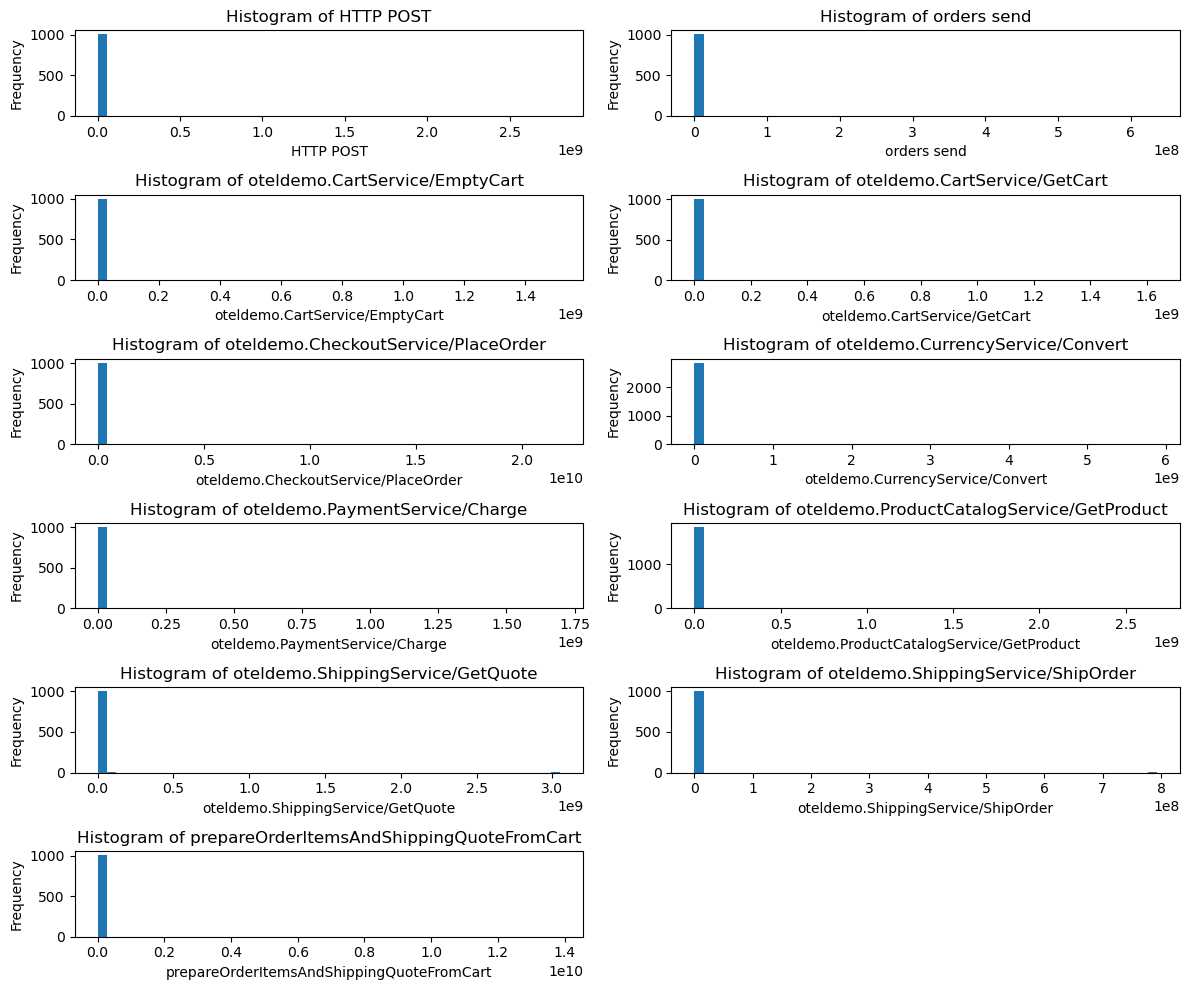

In [70]:
fig, axes = plt.subplots(nrows=len(checkoutservice.columns) // 2 + len(checkoutservice.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(checkoutservice.columns):
    ax = axes[i]
    ax.hist(checkoutservice[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)
    
for ax in axes[len(checkoutservice.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [71]:
checkoutservice.describe()

Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
count,1.005000e+03,1.005000e+03,1.005000e+03,1.008000e+03,1.008000e+03,2.854000e+03,1.005000e+03,1.853000e+03,1.005000e+03,1.005000e+03,1.008000e+03
mean,5.587508e+06,1.265241e+06,3.014498e+06,3.245086e+06,4.326300e+07,4.125314e+06,3.377902e+06,2.893583e+06,6.072715e+06,1.577512e+06,2.752276e+07
std,8.861700e+07,2.006495e+07,4.775230e+07,5.146828e+07,6.861568e+08,1.101561e+08,5.349122e+07,6.229029e+07,9.623260e+07,2.498071e+07,4.365152e+08
min,1.881627e+06,3.624130e+05,1.137549e+06,9.887140e+05,9.261794e+06,1.430799e+06,1.290450e+06,1.639310e+05,1.521007e+06,5.055040e+05,7.299706e+06
25%,2.213882e+06,4.739860e+05,1.294633e+06,1.199671e+06,1.752256e+07,1.713878e+06,1.480267e+06,2.649080e+05,1.822793e+06,6.820670e+05,1.019133e+07
50%,2.343711e+06,5.323810e+05,1.369276e+06,1.384536e+06,1.960225e+07,1.953837e+06,1.569559e+06,7.747510e+05,2.961032e+06,7.465020e+05,1.209153e+07
75%,2.530351e+06,6.461800e+05,1.513371e+06,1.769029e+06,2.328746e+07,2.183844e+06,1.735060e+06,1.057614e+06,3.274952e+06,8.361340e+05,1.543117e+07
max,2.807723e+09,6.357834e+08,1.514785e+09,1.635524e+09,2.180455e+10,5.886823e+09,1.697396e+09,2.680905e+09,3.051539e+09,7.926998e+08,1.387147e+10


In [72]:
def outliers(col):
    Q1=checkoutservice[col].quantile(0.25)
    Q3=checkoutservice[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outliers=checkoutservice[(checkoutservice[col]>upper_bound) | (checkoutservice[col]<lower_bound)]
    outliers=outliers.drop('All')
    return outliers

    

In [73]:
#HTTP POST OUTLIERS
outliers('HTTP POST')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
c9f4e79b7a0259a7,a29cae2f4af0f8a3,008776a03a8dc10b4fd67aeb86fd7fe7,114558878.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bf844c1aa73ceea8,64517d238a57672e,ea6e9033d4114ae998e40b4d405d2a19,69112945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c1625bc5394ced22,e83cdce42cdd5801,5344a21fcab0a9af3a05554795d158ca,53386199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68041a7278190d00,685f24f5bc93d98c,3d2d9721d216a55acc12fc46d3b39f9b,50163424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4ad5ad56c0ab6824,0f51fc433c2042be,d600eb56d714baa7a4bc9d4b0ac296f2,49614058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
a3fa6e898f4f6f51,c734a839eb543cf6,b806bc0a756d3f54b57c62f0cfc4fc1f,3027963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a871a29c2b0a07d3,f9d7fb13d2d20a48,7186b0b9af73cb56060acdb1c8a8d8c3,3023379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33d039520f117541,1f42f6951224569b,239049bdf6ec5dd9fd6cec5081976d14,3020162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#ORDERS SEND OUTLERS
outliers('orders send')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
00eda61dd02fb88c,a29cae2f4af0f8a3,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,33531936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5845e002b3095b44,14939a0b4c697720,b0e35ab1af02c257e46fe9f715e1bcbd,NaN,8281963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8bf045d6590ebac7,9bf5328140c64f7c,918a701c841793c9de67439764a5ec7d,NaN,4669139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e0e885cfcb08c0af,64517d238a57672e,ea6e9033d4114ae998e40b4d405d2a19,NaN,3106948.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f8638691de58f1ad,e83cdce42cdd5801,5344a21fcab0a9af3a05554795d158ca,NaN,3082215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4494472763b15f9c,63ef34b6abd9cc03,35145a9f82d344c0fa1b069b2ebe5cac,NaN,1763442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2c1e3321ef326b62,685f24f5bc93d98c,3d2d9721d216a55acc12fc46d3b39f9b,NaN,1698163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ba6e0ce06da4b837,f6fefc2ee5df1fd6,1b4b603565aa037d55803656c8c2fdf1,NaN,1491434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50d96a1ad9b94420,b76a71ea44e21573,30d84e85323a73a3833d6303754f6f88,NaN,1419946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
outliers('oteldemo.CartService/EmptyCart')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
4a404d41a49bea40,5f79c2da824fc2d0,f88b1b6363eba3b07b1ee5c0883dcd21,NaN,NaN,40765720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645a3460452d3fdb,c80a3fe501189596,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,5010198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f3def463a35b9ed8,f022abf430f6d85d,a2ce9dd50de40d31bfa62e2151c663c7,NaN,NaN,4847220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003bbfc48d4d5cb3,3e430ae0ec746880,0c085c0512df4859da1415896e23c34d,NaN,NaN,4466833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6a579f0646450a7b,a29cae2f4af0f8a3,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,4436765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378abd2b286f431,e5239fac74cd8a8a,ab2ce41680d8652aa4f7fd1e86d4fd45,NaN,NaN,1865557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fc872f614af0fcd3,7449b516829e7651,594c9d03d7f6cbb23dbbe3663644d1b8,NaN,NaN,1862325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434035f2603fa260,864e30fe9f47c01a,55b16483ad55c601b9ce64821ae35c1c,NaN,NaN,1859458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
outliers('oteldemo.CartService/GetCart')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
55c3ad023846cb6d,569e97878e2f79d6,a95dfc2098657f2e6bd480b5cc5fd27f,NaN,NaN,NaN,7954727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e5a72b16d1650609,0eb1a5be45d2bdce,1cc9ec71f793ab364f4b1b480f455f6f,NaN,NaN,NaN,6683223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a22fc4b995c4ae04,6f3857799664a550,377444a81c06b53910210076d138d5ba,NaN,NaN,NaN,6214096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86157dfebaf96a96,1cc2c09463af5c39,fe2a19f6c6362d74a21895344474a240,NaN,NaN,NaN,5780233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b7251cfb7e8c73bb,6020217d7a2115b5,dd3d67b0eb58c61978a9569d98279217,NaN,NaN,NaN,5581430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fa904c406b4aa9ec,62253b4c5438f0e3,75093702cfe8597d0b224f630eb07194,NaN,NaN,NaN,2685610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175d63416940ef68,e11398d389ab75fc,72a03f3050a711f3186f387409791a83,NaN,NaN,NaN,2658570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1e72ddad25072c66,5e43cdcb10775eaa,9cbefd754620e1d1ae9a20e86e104f0d,NaN,NaN,NaN,2652316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
outliers('oteldemo.CheckoutService/PlaceOrder')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
a29cae2f4af0f8a3,8d2a4e8887dec518,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,NaN,NaN,189368676.0,NaN,NaN,NaN,NaN,NaN,NaN
c80a3fe501189596,c2d419cbad97b81e,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,117244496.0,NaN,NaN,NaN,NaN,NaN,NaN
64517d238a57672e,51cfed120b686a35,ea6e9033d4114ae998e40b4d405d2a19,NaN,NaN,NaN,NaN,88916409.0,NaN,NaN,NaN,NaN,NaN,NaN
0f51fc433c2042be,730cebba8f2c8fed,d600eb56d714baa7a4bc9d4b0ac296f2,NaN,NaN,NaN,NaN,78509097.0,NaN,NaN,NaN,NaN,NaN,NaN
e83cdce42cdd5801,68baaf8e52b1cf5f,5344a21fcab0a9af3a05554795d158ca,NaN,NaN,NaN,NaN,70782863.0,NaN,NaN,NaN,NaN,NaN,NaN
685f24f5bc93d98c,c70e21b1975e6507,3d2d9721d216a55acc12fc46d3b39f9b,NaN,NaN,NaN,NaN,69112217.0,NaN,NaN,NaN,NaN,NaN,NaN
957e6112a6a86094,429e918c2e0d3102,f981e8e9207c54116925c761edfd5f49,NaN,NaN,NaN,NaN,68220308.0,NaN,NaN,NaN,NaN,NaN,NaN
e5239fac74cd8a8a,61ab4a8781c898cd,ab2ce41680d8652aa4f7fd1e86d4fd45,NaN,NaN,NaN,NaN,65865764.0,NaN,NaN,NaN,NaN,NaN,NaN
5f79c2da824fc2d0,1645ebca4237ddb8,f88b1b6363eba3b07b1ee5c0883dcd21,NaN,NaN,NaN,NaN,64564720.0,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
outliers('oteldemo.CurrencyService/Convert')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
6fc12f73feb4af9b,8b44db41be2045fd,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,NaN,11106583.0,NaN,NaN,NaN,NaN,NaN
920f65abe9a93f1f,0eb1a5be45d2bdce,1cc9ec71f793ab364f4b1b480f455f6f,NaN,NaN,NaN,NaN,NaN,9067506.0,NaN,NaN,NaN,NaN,NaN
262f47062b31c269,df7918643d87870b,9c1d72390196cf6657bcff94c775d522,NaN,NaN,NaN,NaN,NaN,8870262.0,NaN,NaN,NaN,NaN,NaN
d50e633b37c24d1e,14e8b6f261e75fa8,d916d4751d7e2fe20c6a2b90f6307bce,NaN,NaN,NaN,NaN,NaN,8755689.0,NaN,NaN,NaN,NaN,NaN
cac40604ae1a67e2,cec23c495bab4d7e,b6e6e3f2ddf279eb968df1fb39ae74e5,NaN,NaN,NaN,NaN,NaN,8722514.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419b5f9ae7b22497,ecdc9d0bd5db482f,494bf2601efa5d0cb7342dc13de52b28,NaN,NaN,NaN,NaN,NaN,2917036.0,NaN,NaN,NaN,NaN,NaN
ccf0fb922f6bb36e,fabe5bbd289390f4,09ba3ba1ac82563fbeccdc37c28837a1,NaN,NaN,NaN,NaN,NaN,2916575.0,NaN,NaN,NaN,NaN,NaN
72fc1cdfd7698091,998f6750236c51a9,7a97bab18784b0f4671477341b0af9f7,NaN,NaN,NaN,NaN,NaN,2899035.0,NaN,NaN,NaN,NaN,NaN


In [79]:
outliers('oteldemo.PaymentService/Charge')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
416b80c1fca5d83d,a29cae2f4af0f8a3,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,NaN,NaN,NaN,NaN,8234629.0,NaN,NaN,NaN,NaN
fca2d686e331b3a2,c80a3fe501189596,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,NaN,NaN,7256333.0,NaN,NaN,NaN,NaN
0ce60af3279e479d,dc7a80e5b418ee54,19dbc4d458346f11a9accfd084716eeb,NaN,NaN,NaN,NaN,NaN,NaN,6215260.0,NaN,NaN,NaN,NaN
fbb48d1f2abd2540,864e30fe9f47c01a,55b16483ad55c601b9ce64821ae35c1c,NaN,NaN,NaN,NaN,NaN,NaN,4212503.0,NaN,NaN,NaN,NaN
7298c76545178b50,c08c1d4700e386df,5ea44213bd48c53e94de26ee2a7b6c07,NaN,NaN,NaN,NaN,NaN,NaN,3449120.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1f53cd9cb3698af0,9ee453bd49199474,ebd11adac27e440acd353dc935863075,NaN,NaN,NaN,NaN,NaN,NaN,2143363.0,NaN,NaN,NaN,NaN
8ef0aff148261099,2c3c7a833fb31db4,c5a1741242321b6d82644a0b52824925,NaN,NaN,NaN,NaN,NaN,NaN,2126786.0,NaN,NaN,NaN,NaN
425956a520e75b68,f6fefc2ee5df1fd6,1b4b603565aa037d55803656c8c2fdf1,NaN,NaN,NaN,NaN,NaN,NaN,2123656.0,NaN,NaN,NaN,NaN


In [80]:
outliers('oteldemo.ProductCatalogService/GetProduct')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
9716dcb08b3176fe,b296ae78af1372f2,ea74139bbe40f9efb691d7c58062bf11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14191271.0,NaN,NaN,NaN
48e6f42d31402d05,7864b2bb713afe1e,1b4b603565aa037d55803656c8c2fdf1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13733241.0,NaN,NaN,NaN
52fbc9c62be20b94,8a3e51a67583703f,e5c22ae3ee8183f6b82ab766371eccc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13374372.0,NaN,NaN,NaN
4dc64a84df8ca7e1,ac37347d7705e05a,1c32d53ca121e4216738e9b42cb581d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11837544.0,NaN,NaN,NaN
2b4b70a81c30ca1c,738fed0e23281a05,e14f87eeeafd703a3de0166c80de92af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11830508.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36fa1fdac26a39ae,688ec16be0530d83,bfc8d744e877a7d4f3579f492e52346a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2464978.0,NaN,NaN,NaN
5b99aca08b72dcf1,885c2c3d9d01c5fd,04ed29a1ff8510a8af11cea8836c61a7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2439438.0,NaN,NaN,NaN
d6840c5d7a78a587,ec426f089025bc3a,b0553db9461e06cffb7e501ae56cdcb0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2326162.0,NaN,NaN,NaN


In [81]:
outliers('oteldemo.ShippingService/GetQuote')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
44aff8e92ca6f6d8,8b44db41be2045fd,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79261800.0,NaN,NaN
8d5033923121dc72,2d0534e1a37d5f2c,f981e8e9207c54116925c761edfd5f49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51697500.0,NaN,NaN
92f3ecc90fcc41d0,93320f957c89dfdc,ab2ce41680d8652aa4f7fd1e86d4fd45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41798216.0,NaN,NaN
c96a72d2a7bcf397,81bb3aefe1c892c7,2e2e4fb8df4d7e71183afdd247ccb301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36932555.0,NaN,NaN
55f5046af435a317,cec23c495bab4d7e,b6e6e3f2ddf279eb968df1fb39ae74e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27291233.0,NaN,NaN
11112026402415ea,db12cf7da7d114e3,e49d61c95701b3fc1fadf358daebdb24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25176196.0,NaN,NaN
0f416d23b62226f8,014671180e6061ca,c8aa5c18d583393be2db45ffc9b509fd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23796021.0,NaN,NaN
549cb0d587d809a3,fe3af407f28ef7a8,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18050298.0,NaN,NaN
e6b2df7e25465b0e,cdeea500a821b67f,a4e5ca7b7a09fe1440b1153c651f30bf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13628081.0,NaN,NaN


In [82]:
outliers('oteldemo.ShippingService/ShipOrder')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
a4ef4cb598ce7903,c80a3fe501189596,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3168754.0,NaN
2a776b99b22de437,e5a55694abc484bc,177c226778b6701b781fc02f5907b6b3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2203841.0,NaN
dc71897948857f79,ba0b526b757463f6,4cd894bd7b519b30761946832a12ea4e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2039350.0,NaN
15b3a3787775051a,a29cae2f4af0f8a3,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803861.0,NaN
7b67536a2462a49d,cfd5fd50ab31a696,2e2e4fb8df4d7e71183afdd247ccb301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1707491.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
a3085efae5cffca5,a9b72188285b627c,a3b755db8075e739c9d31fd4b99a21e0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1079879.0,NaN
b2a31b503cd0465c,a26ae5d55439b289,f80fb8a8c9a62a9f6ae338b63d411d3c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075848.0,NaN
c2ca43ebc0974cd2,1cd900a16c791af1,edc3de6b78cbb04908bd5f3bd10a4742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073865.0,NaN


In [83]:
outliers('prepareOrderItemsAndShippingQuoteFromCart')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2056435486.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  outliers=outliers.drop('All')


,,Name,HTTP POST,orders send,oteldemo.CartService/EmptyCart,oteldemo.CartService/GetCart,oteldemo.CheckoutService/PlaceOrder,oteldemo.CurrencyService/Convert,oteldemo.PaymentService/Charge,oteldemo.ProductCatalogService/GetProduct,oteldemo.ShippingService/GetQuote,oteldemo.ShippingService/ShipOrder,prepareOrderItemsAndShippingQuoteFromCart
spanID,parentSpanID,traceID,,,,,,,,,,,
8b44db41be2045fd,c80a3fe501189596,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95573634.0
2d0534e1a37d5f2c,957e6112a6a86094,f981e8e9207c54116925c761edfd5f49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60333457.0
93320f957c89dfdc,e5239fac74cd8a8a,ab2ce41680d8652aa4f7fd1e86d4fd45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55470798.0
cec23c495bab4d7e,884749f0f2e862ae,b6e6e3f2ddf279eb968df1fb39ae74e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52751731.0
81bb3aefe1c892c7,cfd5fd50ab31a696,2e2e4fb8df4d7e71183afdd247ccb301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48613003.0
0eb1a5be45d2bdce,966aded8db92b5b2,1cc9ec71f793ab364f4b1b480f455f6f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39796112.0
014671180e6061ca,18d43cd187af802f,c8aa5c18d583393be2db45ffc9b509fd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34069355.0
db12cf7da7d114e3,8dff1fbee5d1cf37,e49d61c95701b3fc1fadf358daebdb24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32686782.0
14e8b6f261e75fa8,914551e0946a3915,d916d4751d7e2fe20c6a2b90f6307bce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32069653.0


In [84]:
# currencyservice
currencyservice=df.query('` serviceName` == "currencyservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
currencyservice

,,Name,CurrencyService/Convert,CurrencyService/GetSupportedCurrencies,All
spanID,parentSpanID,traceID,,,
All,,,92977880.0,112391.0,93090271
61427c64bd530ea0,cd7c148c394119c1,f15f87687421423e47289984e0b27ba7,210960.0,NaN,210960
9350005d9bbe015d,57a60d2f4fbdee03,87468cfc46ed5a0759d14130afc4d561,197759.0,NaN,197759
5473fefb4a92e67a,cac40604ae1a67e2,b6e6e3f2ddf279eb968df1fb39ae74e5,177332.0,NaN,177332
3d1fd58503d4cc0a,3e9c15cf0d641e7d,0e43db2cea606faa97eaeee7bddc3980,151451.0,NaN,151451
...,...,...,...,...,...
7cb4ad8ae34675ff,e56bf2fbca11961a,2b3e959818c04e631d7ebc0b5236fb54,NaN,15700.0,15700
1d6cda49872ec6c5,c4f856f606f07b26,b9983cf5079ede6f7e5170bee6f31964,NaN,15565.0,15565
b74d5c40c9c8bad2,8e6914e6f600830d,45c294d9b49302f6704534befb74d7cf,NaN,15192.0,15192


In [85]:
currencyservice=currencyservice.drop('All')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\324486583.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  currencyservice=currencyservice.drop('All')


In [86]:
currencyservice=currencyservice.drop("All",axis=1)

In [87]:
def outliers(col):
    Q1=currencyservice[col].quantile(0.25)
    Q3=currencyservice[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outliers=currencyservice[(currencyservice[col]>upper_bound) | (currencyservice[col]<lower_bound)]
   
    return outliers

In [88]:
currencyservice.describe()

Name,CurrencyService/Convert,CurrencyService/GetSupportedCurrencies
count,2853.000000,7.000000
mean,32589.512794,16055.857143
std,11817.371122,2595.413033
min,15798.000000,12222.000000
25%,25708.000000,15011.000000
50%,30571.000000,15565.000000
75%,35301.000000,17419.000000
max,210960.000000,19744.000000


In [89]:
outliers('CurrencyService/Convert')

,,Name,CurrencyService/Convert,CurrencyService/GetSupportedCurrencies
spanID,parentSpanID,traceID,,
61427c64bd530ea0,cd7c148c394119c1,f15f87687421423e47289984e0b27ba7,210960.0,NaN
9350005d9bbe015d,57a60d2f4fbdee03,87468cfc46ed5a0759d14130afc4d561,197759.0,NaN
5473fefb4a92e67a,cac40604ae1a67e2,b6e6e3f2ddf279eb968df1fb39ae74e5,177332.0,NaN
3d1fd58503d4cc0a,3e9c15cf0d641e7d,0e43db2cea606faa97eaeee7bddc3980,151451.0,NaN
d352459fa09dabd6,920f65abe9a93f1f,1cc9ec71f793ab364f4b1b480f455f6f,149260.0,NaN
...,...,...,...,...
ca822ef1e225302e,50c957b747a37e89,d30c687361704e4e199f6f57d520275b,49972.0,NaN
6acd0d3cbad1ff39,77ee06acf49dae6d,b4e5c149bdc9242d9e28f72e0fccf458,49959.0,NaN
b4b7851fc766d70b,ce7017d505da8f8d,bb820990b1e7456aa80361449e1c950f,49933.0,NaN


In [90]:
outliers('CurrencyService/GetSupportedCurrencies') # there are no outliers

,,Name,CurrencyService/Convert,CurrencyService/GetSupportedCurrencies
spanID,parentSpanID,traceID,,


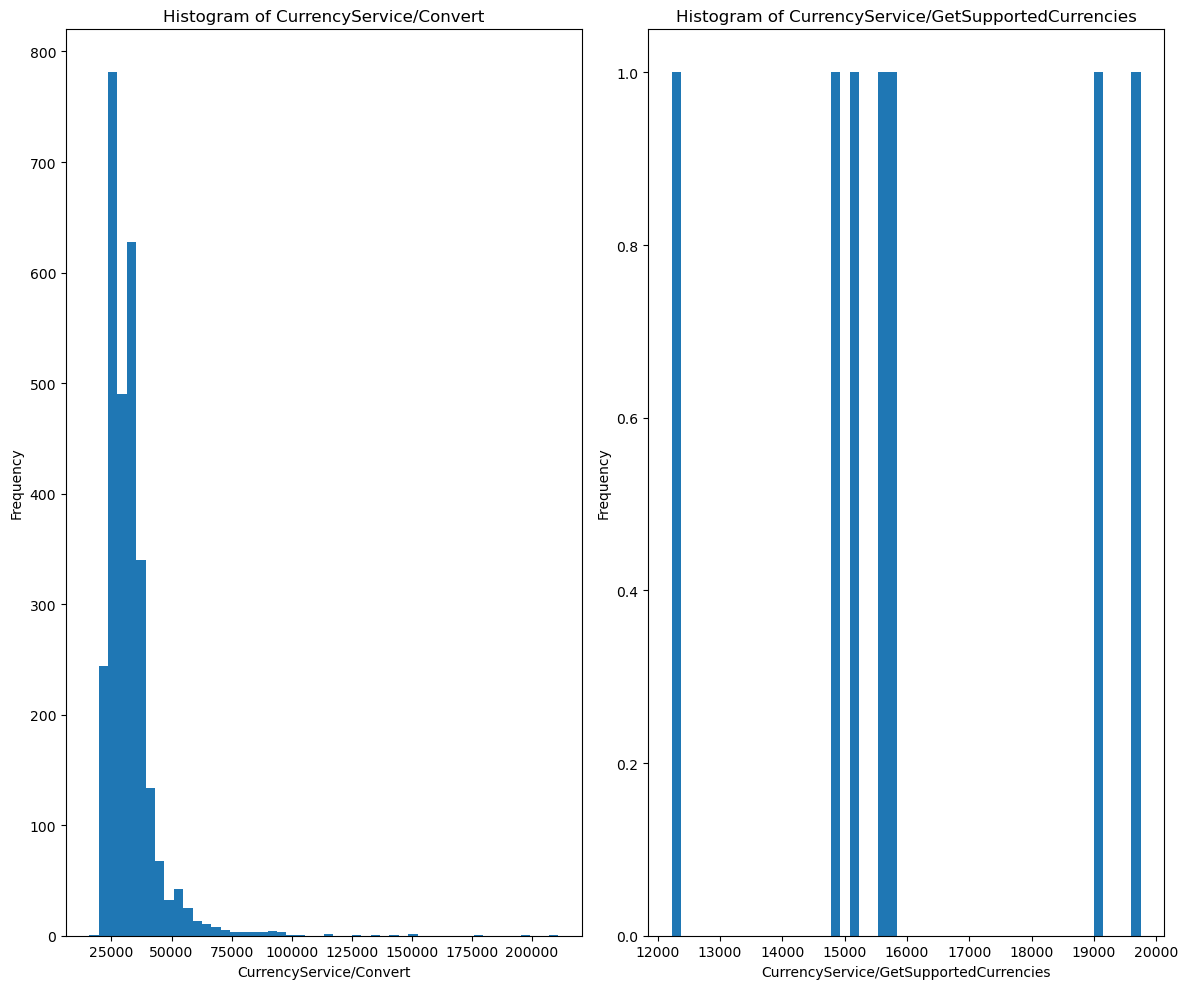

In [91]:
fig, axes = plt.subplots(nrows=len(currencyservice.columns) // 2 + len(currencyservice.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(currencyservice.columns):
    ax = axes[i]
    ax.hist(currencyservice[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for ax in axes[len(currencyservice.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [92]:
set(df[' serviceName'])

{'accountingservice',
 'adservice',
 'cartservice',
 'checkoutservice',
 'currencyservice',
 'emailservice',
 'featureflagservice',
 'frauddetectionservice',
 'frontend',
 'frontend-proxy',
 'frontend-web',
 'loadgenerator',
 'paymentservice',
 'productcatalogservice',
 'quoteservice',
 'recommendationservice',
 'shippingservice'}

In [93]:
#emailservice
emailservice=df.query('` serviceName` == "emailservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
emailservice

,,Name,POST /send_order_confirmation,send_email,sinatra.render_template,All
spanID,parentSpanID,traceID,,,,
All,,,1.937834e+09,1.402761e+09,232966715.0,3573562064
9337f3e5b839b969,c9f4e79b7a0259a7,008776a03a8dc10b4fd67aeb86fd7fe7,1.121311e+08,NaN,NaN,112131115
fd38434c5b0bbe4f,9337f3e5b839b969,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,1.115858e+08,NaN,111585825
11a43b9c492ef77b,12984b48e18cd942,9043ae4ad110ae540418248a1dca4191,1.413619e+07,NaN,NaN,14136194
d53a0c8058407ab3,3e1e43de7e21e44f,e7099061efe5cfba647604d9f8342ce7,1.371106e+07,NaN,NaN,13711064
...,...,...,...,...,...,...
082ebe48c2682a3f,110d4aef5fa1438b,b3054da798ce2a5e467862db319449de,NaN,NaN,32090.0,32090
29566c5610bf4ed3,1debc90a1bdacb86,f15b5ed4e14f593d5218d084ca4028f2,NaN,NaN,32015.0,32015
eb89f47d8ee9899e,e40ad998df14e90f,e7099061efe5cfba647604d9f8342ce7,NaN,NaN,32009.0,32009


In [94]:
emailservice=emailservice.drop('All')

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\64477262.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  emailservice=emailservice.drop('All')


In [95]:
emailservice=emailservice.drop('All',axis=1)

In [96]:
def outliers(col):
    Q1=emailservice[col].quantile(0.25)
    Q3=emailservice[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outliers=emailservice[(emailservice[col]>upper_bound) | (emailservice[col]<lower_bound)]
   
    return outliers

In [97]:
emailservice.describe()

Name,POST /send_order_confirmation,send_email,sinatra.render_template
count,1.004000e+03,1.004000e+03,2.008000e+03
mean,1.930114e+06,1.397173e+06,1.160193e+05
std,3.574774e+06,3.529035e+06,1.414735e+05
min,1.204462e+06,8.631390e+05,3.119300e+04
25%,1.581356e+06,1.064044e+06,3.611875e+04
50%,1.696468e+06,1.221128e+06,1.254865e+05
75%,1.836536e+06,1.344575e+06,1.448388e+05
max,1.121311e+08,1.115858e+08,2.736991e+06


In [98]:
outliers('POST /send_order_confirmation')

,,Name,POST /send_order_confirmation,send_email,sinatra.render_template
spanID,parentSpanID,traceID,,,
9337f3e5b839b969,c9f4e79b7a0259a7,008776a03a8dc10b4fd67aeb86fd7fe7,112131115.0,NaN,NaN
11a43b9c492ef77b,12984b48e18cd942,9043ae4ad110ae540418248a1dca4191,14136194.0,NaN,NaN
d53a0c8058407ab3,3e1e43de7e21e44f,e7099061efe5cfba647604d9f8342ce7,13711064.0,NaN,NaN
879cc79ca4d85057,16a3d5d451f0d22c,e76763ca4358b16f47cd97c733a2726e,8998722.0,NaN,NaN
3a89d27785ab4002,bf844c1aa73ceea8,ea6e9033d4114ae998e40b4d405d2a19,8839530.0,NaN,NaN
...,...,...,...,...,...
572689900d245ee2,f5dba4f4ce9aa427,377444a81c06b53910210076d138d5ba,2269147.0,NaN,NaN
7fcd00a0e18172af,112105b97703d185,75093702cfe8597d0b224f630eb07194,2260898.0,NaN,NaN
1258cf8f379040e2,3fba0c40a0e9b8cd,469802e23abf06c5e5d1fd336eaf3563,2251228.0,NaN,NaN


In [99]:
outliers('send_email')

,,Name,POST /send_order_confirmation,send_email,sinatra.render_template
spanID,parentSpanID,traceID,,,
fd38434c5b0bbe4f,9337f3e5b839b969,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,111585825.0,NaN
08850ef3e1de6e19,11a43b9c492ef77b,9043ae4ad110ae540418248a1dca4191,NaN,10554918.0,NaN
edf75a4a9e73afd0,d53a0c8058407ab3,e7099061efe5cfba647604d9f8342ce7,NaN,9582620.0,NaN
c3df9a73a4b070ba,334ff9367f3c321a,f88b1b6363eba3b07b1ee5c0883dcd21,NaN,6958827.0,NaN
39188afdd05412e5,4822e36d01312726,5344a21fcab0a9af3a05554795d158ca,NaN,6597104.0,NaN
7674f24f3823c100,3a89d27785ab4002,ea6e9033d4114ae998e40b4d405d2a19,NaN,5855649.0,NaN
4c1062c9d2c0b110,7763fe5a741bf646,30d84e85323a73a3833d6303754f6f88,NaN,4693556.0,NaN
2e07e473c69ed4a3,84f381d58b182c79,da54d4b26095f817ca62cee19a482e61,NaN,4374189.0,NaN
8679fcc3abcc56d2,547206f56d7f3188,3d2d9721d216a55acc12fc46d3b39f9b,NaN,3599005.0,NaN


In [100]:
outliers('sinatra.render_template')

,,Name,POST /send_order_confirmation,send_email,sinatra.render_template
spanID,parentSpanID,traceID,,,
0296cf91b3f5abd6,76ef24633b7d6bcd,e76763ca4358b16f47cd97c733a2726e,NaN,NaN,2736991.0
150b0996bd532440,674900f65ec71bc0,0dfe74d423d3637da6051b1005045901,NaN,NaN,2190975.0
5d41df0fdef3f88b,fd38434c5b0bbe4f,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,1839995.0
0e469fa061eea669,1dda27c0a5208043,ac75c0bd91218fd0b4fe5513197dda79,NaN,NaN,1569357.0
1f0235bafbd91d73,2112ae33dc1b7355,ff452b638f4c6261e7854d2f5602087d,NaN,NaN,1449416.0
...,...,...,...,...,...
bf0444ff172343b1,67d8d967b811ed6e,a24892c3ee39945712db36bd0c4af3e1,NaN,NaN,312109.0
23a95ddd3d4a95fa,0a62076cd7a29395,ee2a09ca9ecc364bc84a0b716319b06b,NaN,NaN,311179.0
08107daf389ebde9,1bae3e0c6e94362e,09990e70404fe3aa6c40ae4ba4e94111,NaN,NaN,310781.0


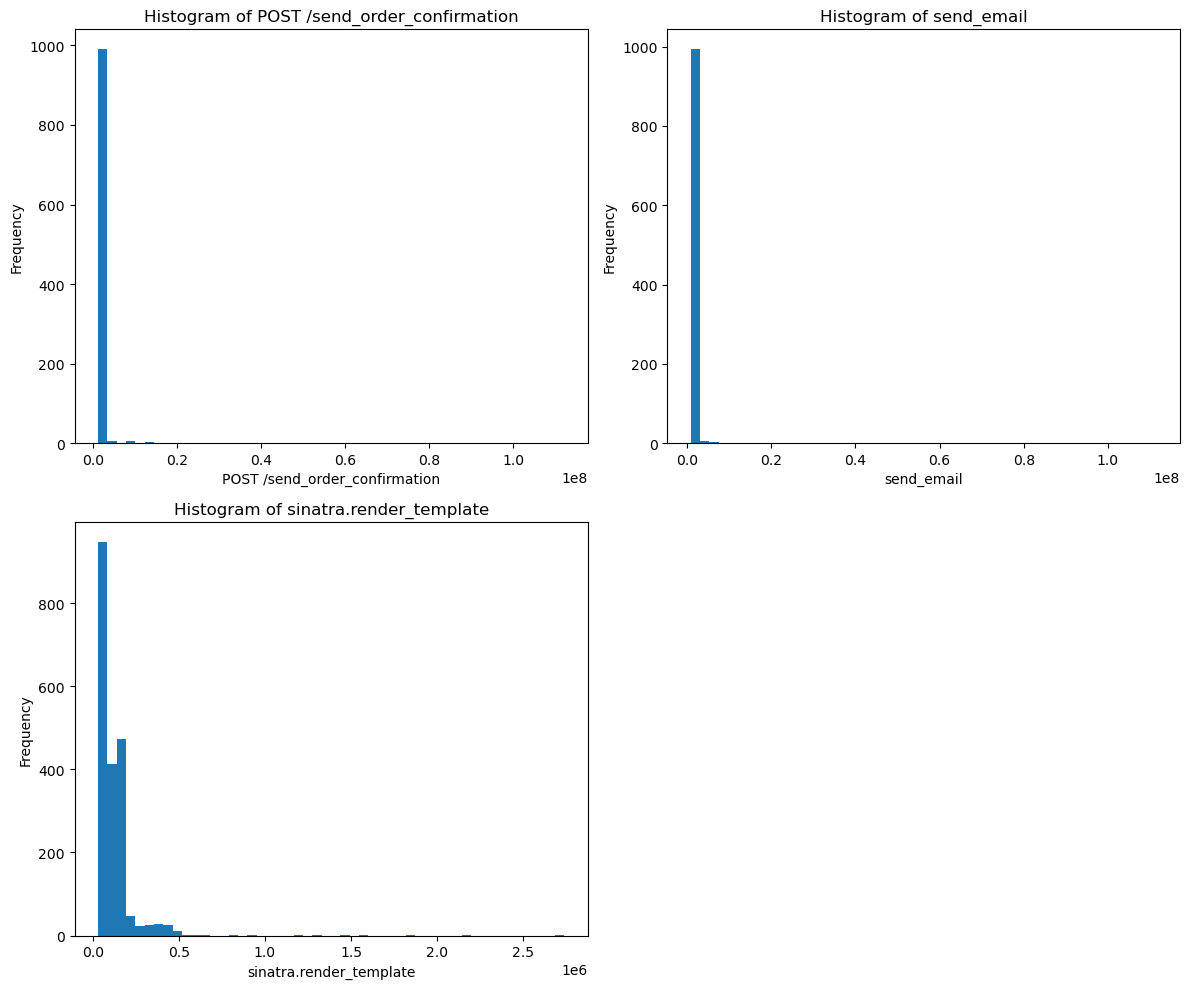

In [101]:
fig, axes = plt.subplots(nrows=len(emailservice.columns) // 2 + len(emailservice.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(emailservice.columns):
    ax = axes[i]
    ax.hist(emailservice[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for ax in axes[len(emailservice.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [102]:
#feature flag service
featureflagservice=df.query('` serviceName` == "featureflagservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
featureflagservice

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags,All
spanID,parentSpanID,traceID,,,,,,,,,
All,,,304554804.0,8466980.0,18890137.0,7139951.0,4.316950e+09,292127.0,7046690.0,3.497464e+09,8160804151
7931175035cc9197,eb203c83bd05a2c1,5f56407905f23b472a9b24e03624a832,NaN,NaN,NaN,NaN,6.141639e+06,NaN,NaN,NaN,6141639
b5bd19fc6e09b876,cb8ca7b784fd58d9,e8559f7abff076c8088e16be83fc5c69,NaN,NaN,NaN,NaN,5.818777e+06,NaN,NaN,NaN,5818777
cb43384eca212232,88c157a4190f6ef8,13bab71ee31bf5a6060f97edf00eee2a,NaN,NaN,NaN,NaN,5.617627e+06,NaN,NaN,NaN,5617627
a65e5a8cb79f9c09,478c520995e62537,69af8c4af5aef2e3c2cbd8bd7b133698,NaN,NaN,NaN,NaN,5.078655e+06,NaN,NaN,NaN,5078655
...,...,...,...,...,...,...,...,...,...,...,...
9e52cc3064f54231,6106fcf7d072ccf8,866684a2b8475e29b6c2b1119d217b27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.381840e+05,338184
3483cb2b922c4499,ce37c16b5b7bbba7,17cb0b0f315786595882d7b805032341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.353120e+05,335312
00d1faa3a3c4d594,072aeec11ab99a7a,7a749bc4a3a2a43721735886e16761aa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.312520e+05,331252


In [103]:
featureflagservice=featureflagservice.drop("All")

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\3877405965.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  featureflagservice=featureflagservice.drop("All")


In [104]:
featureflagservice=featureflagservice.drop("All",axis=1)

In [105]:
def outliers(col):
    Q1=featureflagservice[col].quantile(0.25)
    Q3=featureflagservice[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outliers=featureflagservice[(featureflagservice[col]>upper_bound) | (featureflagservice[col]<lower_bound)]
   
    return outliers

In [106]:
featureflagservice.describe()

Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
count,2.890000e+02,6.000000e+00,8.000000e+00,4.000000e+00,3.502000e+03,1.0,4.000000e+00,3.809000e+03
mean,1.053823e+06,1.411163e+06,2.361267e+06,1.784988e+06,1.232710e+06,292127.0,1.761672e+06,9.182105e+05
std,3.189593e+05,2.268446e+05,1.372189e+06,1.751426e+05,7.064649e+05,NaN,7.395228e+05,5.508040e+05
min,7.397570e+05,1.093860e+06,7.476530e+05,1.540898e+06,4.469740e+05,292127.0,1.320160e+06,3.305780e+05
25%,8.644500e+05,1.314643e+06,1.289487e+06,1.733129e+06,6.768338e+05,292127.0,1.359521e+06,5.068360e+05
50%,9.626060e+05,1.364030e+06,2.230538e+06,1.823052e+06,1.040218e+06,292127.0,1.430282e+06,7.588780e+05
75%,1.078918e+06,1.554722e+06,3.137954e+06,1.874910e+06,1.546534e+06,292127.0,1.832434e+06,1.137984e+06
max,2.953474e+06,1.728593e+06,4.672489e+06,1.952950e+06,6.141639e+06,292127.0,2.865966e+06,4.981335e+06


In [107]:
outliers('/')

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
spanID,parentSpanID,traceID,,,,,,,,
47c5627144dea296,46c12d458cfb8322,d2a3e950bf91ab51115dd2cd4ab972ad,2953474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d05779c8a62bd1bc,afdcbe881eef85cb,dd8c1c7a92dd272d66829c6fa88133d4,2714015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7f910f5b879b92e9,468ab1f5212c831a,81b2fa0cfbaeb905fdfa4d9e8fe0e8da,2640481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c3d8a7488b2cdedb,de1b91ae6d2414fd,69dccd8c81847471fc481abe0208feb9,2180103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a9232125f818fcb8,81178de99b1af7f6,3aa3d1ae85178319fa6f6c0c450e0841,2107519.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3d00be7d43460599,12a11734be363b2b,9d1ac50e179bb01ebc2d8da19d800fb5,2080672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e98624c9a9a5df71,22e4bf9ec2f1b0a9,8a45c8da74f91ebb2d870c0740529be2,1949161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a9b4e75286a4a5fc,63f4a48ba5e06cfc,a860bb63ebeb1b81d9bfa3f82bfa098d,1948333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e51157044c1d0a72,da35af5615fc26c7,d88e93d9658461ba398ef5a16811f002,1940513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
outliers('/featureflags') #this implies that when feature flag appears no span occurs in parallel

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
spanID,parentSpanID,traceID,,,,,,,,


In [109]:
outliers('/featureflags/:id')

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
spanID,parentSpanID,traceID,,,,,,,,


In [110]:
outliers('/featureflags/:id/edit')

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
spanID,parentSpanID,traceID,,,,,,,,


In [111]:
outliers('/oteldemo.FeatureFlagService/GetFlag')

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
spanID,parentSpanID,traceID,,,,,,,,
7931175035cc9197,eb203c83bd05a2c1,5f56407905f23b472a9b24e03624a832,NaN,NaN,NaN,NaN,6141639.0,NaN,NaN,NaN
b5bd19fc6e09b876,cb8ca7b784fd58d9,e8559f7abff076c8088e16be83fc5c69,NaN,NaN,NaN,NaN,5818777.0,NaN,NaN,NaN
cb43384eca212232,88c157a4190f6ef8,13bab71ee31bf5a6060f97edf00eee2a,NaN,NaN,NaN,NaN,5617627.0,NaN,NaN,NaN
a65e5a8cb79f9c09,478c520995e62537,69af8c4af5aef2e3c2cbd8bd7b133698,NaN,NaN,NaN,NaN,5078655.0,NaN,NaN,NaN
5d77d91846c90cbf,f20bf5701bc7bd4f,66c79df2d6016054572a55cfb3d97065,NaN,NaN,NaN,NaN,4635124.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
965d53cf61f4441c,94d6e5c1ec296f5b,0fb80a0428ca72403d6e2634aa1c9d7f,NaN,NaN,NaN,NaN,2870724.0,NaN,NaN,NaN
1dedd9afa4e8fbab,dae549e90e13117c,1957680181a868f3da7b8685aa4657e3,NaN,NaN,NaN,NaN,2864590.0,NaN,NaN,NaN
476cec188d96005c,07e18b80d8e5d89d,387edf61311a8419a9353940493fe9a2,NaN,NaN,NaN,NaN,2861228.0,NaN,NaN,NaN


In [112]:
outliers('HTTP GET')

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
spanID,parentSpanID,traceID,,,,,,,,


In [113]:
outliers('featureflagservice.repo.query')

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
spanID,parentSpanID,traceID,,,,,,,,
0745970bf741a2b7,fa1be0128a929240,aed379478b30fd1e034e63a409a18d2d,NaN,NaN,NaN,NaN,NaN,NaN,2865966.0,NaN


In [114]:
outliers('featureflagservice.repo.query:featureflags')

,,Name,/,/featureflags,/featureflags/:id,/featureflags/:id/edit,/oteldemo.FeatureFlagService/GetFlag,HTTP GET,featureflagservice.repo.query,featureflagservice.repo.query:featureflags
spanID,parentSpanID,traceID,,,,,,,,
2.93835E+15,cb43384eca212232,13bab71ee31bf5a6060f97edf00eee2a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4981335.0
7dfce162caa95ebb,7931175035cc9197,5f56407905f23b472a9b24e03624a832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4755368.0
7152383970069b8f,b5bd19fc6e09b876,e8559f7abff076c8088e16be83fc5c69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4503121.0
62b1ebf49d4a386b,a65e5a8cb79f9c09,69af8c4af5aef2e3c2cbd8bd7b133698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4186610.0
bd74890abbbf96da,e5724b6e0b25b12b,617b2351ffde992ee6ba46f04dad5ca9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3923928.0
...,...,...,...,...,...,...,...,...,...,...
bff0e45736f314a1,d0c7659606db41f0,4af1efe927579d38c9813f48a867408d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2090603.0
3fa4827a7c885709,3886ad81df25de5b,85db9a5ff20466acb6c1fd828324ff8f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2089316.0
c7eb7b7e33f98747,d9e0f814ba4ee34f,c168382d6fb26fb9e190609e85355816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2088901.0


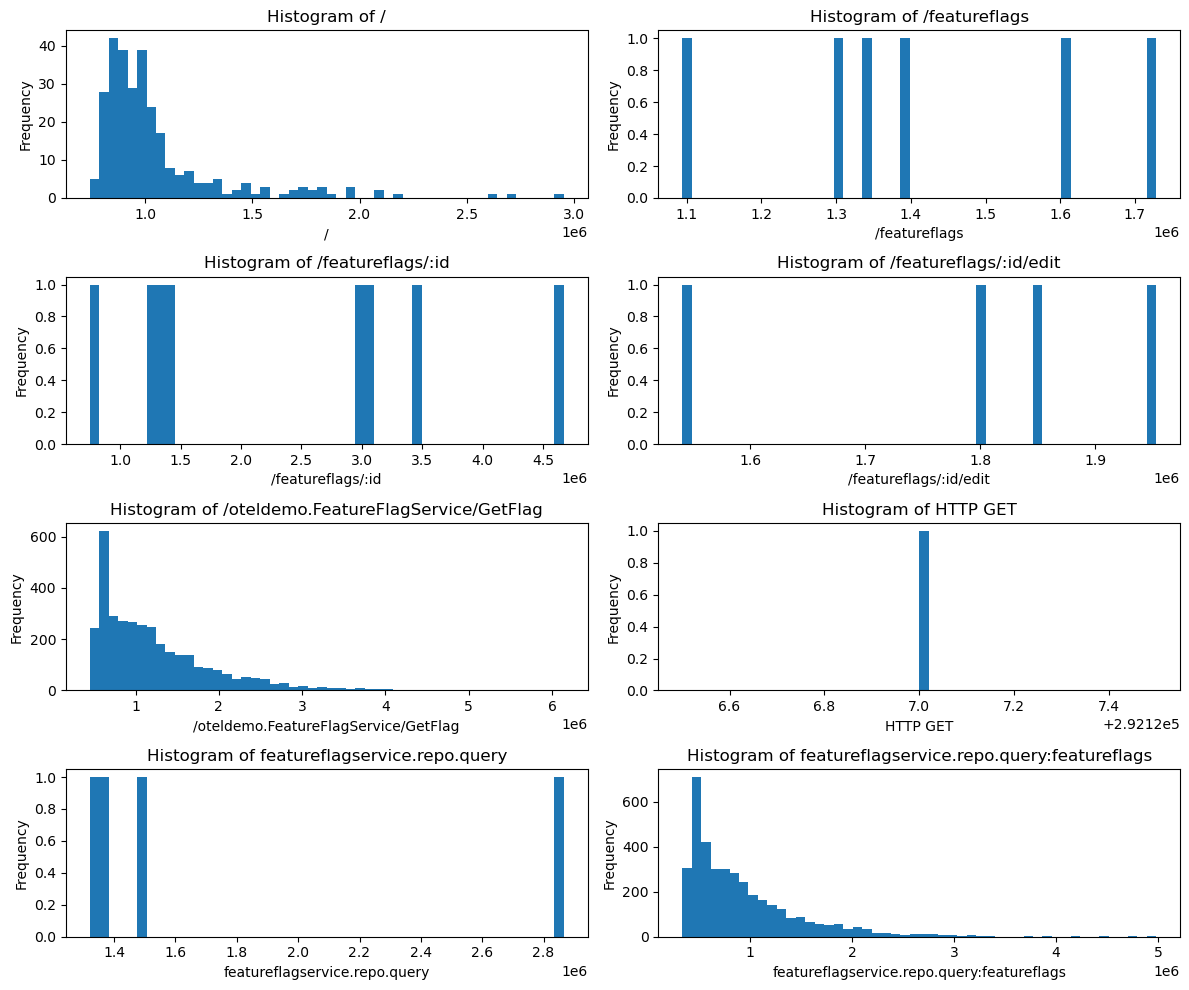

In [115]:
fig, axes = plt.subplots(nrows=len(featureflagservice.columns) // 2 + len(featureflagservice.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

for i, column in enumerate(featureflagservice.columns):
    ax = axes[i]
    ax.hist(featureflagservice[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)


for ax in axes[len(featureflagservice.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [116]:
#frauddetectionservice
frauddetectionservice=df.query('` serviceName` == "frauddetectionservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
frauddetectionservice

,,Name,orders process,All
spanID,parentSpanID,traceID,,
All,,,152178896,152178896
bd55de22ce1de3e3,00eda61dd02fb88c,008776a03a8dc10b4fd67aeb86fd7fe7,21779696,21779696
38e1aebd3baef759,2c1e3321ef326b62,3d2d9721d216a55acc12fc46d3b39f9b,732965,732965
c02e7d930fd5415a,f8638691de58f1ad,5344a21fcab0a9af3a05554795d158ca,637924,637924
d334590a31b6a4ea,50d96a1ad9b94420,30d84e85323a73a3833d6303754f6f88,636767,636767
...,...,...,...,...
c05c20cfb955ea95,1a1dcbb3c50e951c,e7a2dda11703edf3c7baa26e4299e524,75551,75551
95e27b0ab0b99dd1,0df2edbb76b180d9,f602787d7595d5a388c3b6162949f5a8,73574,73574
3f256c08546e0c2a,3a33cf3116b45f14,6580d2eea2bc01872b8dc7d9f55760f8,72961,72961


In [117]:
frauddetectionservice=frauddetectionservice.drop('All')
fraudetectionservice=frauddetectionservice.drop("All",axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\4254983407.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frauddetectionservice=frauddetectionservice.drop('All')


In [118]:
fraudetectionservice.describe()

Name,orders process
count,1.004000e+03
mean,1.515726e+05
std,6.851952e+05
min,7.252300e+04
25%,1.041222e+05
50%,1.203235e+05
75%,1.384692e+05
max,2.177970e+07


In [119]:
def outliers(col):
    Q1=frauddetectionservice[col].quantile(0.25)
    Q3=frauddetectionservice[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outliers=frauddetectionservice[(frauddetectionservice[col]>upper_bound) | (frauddetectionservice[col]<lower_bound)]
   
    return outliers

In [120]:
outliers('orders process')

,,Name,orders process,All
spanID,parentSpanID,traceID,,
bd55de22ce1de3e3,00eda61dd02fb88c,008776a03a8dc10b4fd67aeb86fd7fe7,21779696,21779696
38e1aebd3baef759,2c1e3321ef326b62,3d2d9721d216a55acc12fc46d3b39f9b,732965,732965
c02e7d930fd5415a,f8638691de58f1ad,5344a21fcab0a9af3a05554795d158ca,637924,637924
d334590a31b6a4ea,50d96a1ad9b94420,30d84e85323a73a3833d6303754f6f88,636767,636767
e940695f1a494bdc,f591b85ab1bd1ca2,e8ae7fb5dc187a37477f3ae76073d9f6,462253,462253
...,...,...,...,...
a2d60e151c40549c,32a1b508d2640729,a0b3d5bf47388d7a896a3cddf9baa06f,191612,191612
4bf8689a86cf2062,0d3e432662f2cdbf,7a753936c83067155ce185ddfb83d8de,190727,190727
c8f0c4672b5b45ff,57e2efb313397e34,c7a7924178f5181e16b46953ca7ee348,190426,190426


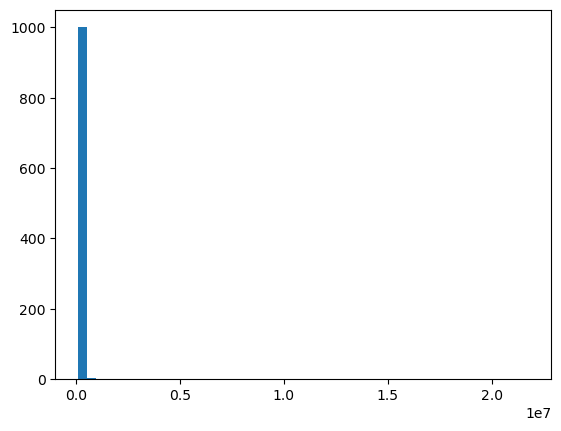

In [121]:
plt.hist(frauddetectionservice['orders process'],bins=50)
plt.show()

In [122]:
#frontend
frontend=df.query('` serviceName` == "frontend"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
frontend

,,Name,HTTP GET,HTTP POST,dns.lookup,fs existsSync,fs open,fs readFileSync,fs readdirSync,fs realpathSync,fs stat,fs statSync,grpc.oteldemo.AdService/GetAds,grpc.oteldemo.CartService/AddItem,grpc.oteldemo.CartService/GetCart,grpc.oteldemo.CheckoutService/PlaceOrder,grpc.oteldemo.CurrencyService/GetSupportedCurrencies,grpc.oteldemo.ProductCatalogService/GetProduct,grpc.oteldemo.ProductCatalogService/ListProducts,grpc.oteldemo.RecommendationService/ListRecommendations,tcp.connect,All
spanID,parentSpanID,traceID,,,,,,,,,,,,,,,,,,,,
All,,,2.472618e+11,8.872178e+10,3971584.0,548864.0,14463232.0,7256320.0,1029632.0,790272.0,36707584.0,13023232.0,7.085299e+09,8.238764e+09,9.490359e+09,2.283463e+10,51480064.0,4.315033e+10,21433856.0,2.439406e+10,2514944.0,451330205184
d23a05b5b8a4289e,82e2fb4b2d7869eb,c09ab655c8a375b444464c68b8e5d0f4,2.361843e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236184320
c1a7c8b28b16abda,d23a05b5b8a4289e,1664a8b9cc421ca2103fab949c2e8c80,2.320077e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232007680
2dab9943197c1151,c1a7c8b28b16abda,1664a8b9cc421ca2103fab949c2e8c80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.312783e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231278336
f3f2b92fa239e804,f4c28470c5ee8288,aae2a48e15a14e4483cb979e95f202f1,NaN,1.989857e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198985728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eab248ca220ebbc3,f9825a9c6013e202,e113ba53962e50aa57b316417a9ebf76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2560
333429245fc84227,f9825a9c6013e202,c32a335fa9c1c66ac552755f18c0d4e8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2560
164a2049c96794fd,f9825a9c6013e202,f66d025242d1bcfba182862ab8e718b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2560


In [123]:
frontend=frontend.drop('All')
frontend=frontend.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\3992433704.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frontend=frontend.drop('All')


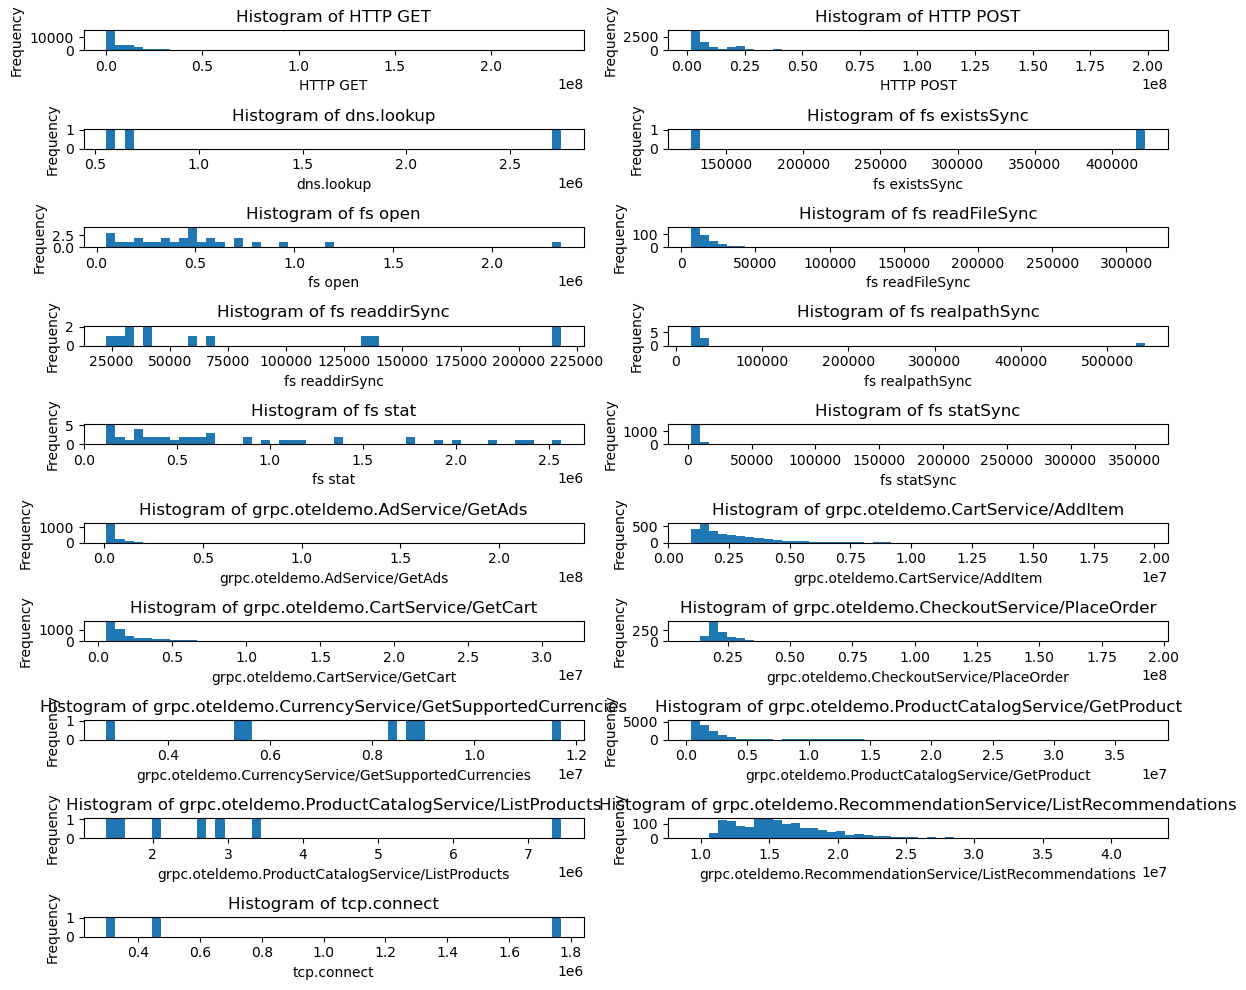

In [124]:
fig, axes = plt.subplots(nrows=len(frontend.columns) // 2 + len(frontend.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(frontend.columns):
    ax = axes[i]
    ax.hist(frontend[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for ax in axes[len(frontend.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [125]:
def outliers(col):
    Q1=frontend[col].quantile(0.25)
    Q3=frontend[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outliers=frontend[(frontend[col]>upper_bound) | (frontend[col]<lower_bound)]
   
    return outliers

In [126]:
frontend.describe()

Name,HTTP GET,HTTP POST,dns.lookup,fs existsSync,fs open,fs readFileSync,fs readdirSync,fs realpathSync,fs stat,fs statSync,grpc.oteldemo.AdService/GetAds,grpc.oteldemo.CartService/AddItem,grpc.oteldemo.CartService/GetCart,grpc.oteldemo.CheckoutService/PlaceOrder,grpc.oteldemo.CurrencyService/GetSupportedCurrencies,grpc.oteldemo.ProductCatalogService/GetProduct,grpc.oteldemo.ProductCatalogService/ListProducts,grpc.oteldemo.RecommendationService/ListRecommendations,tcp.connect
count,2.835700e+04,7.956000e+03,3.000000e+00,2.000000,2.800000e+01,349.000000,12.000000,11.000000,4.400000e+01,1740.000000,1.552000e+03,2.970000e+03,4.462000e+03,1.007000e+03,7.000000e+00,1.574100e+04,7.000000e+00,1.507000e+03,3.000000e+00
mean,8.719603e+06,1.115156e+07,1.323861e+06,274432.000000,5.165440e+05,20791.747851,85802.666667,71842.909091,8.342633e+05,7484.616092,4.565270e+06,2.773995e+06,2.126929e+06,2.267590e+07,7.354295e+06,2.741270e+06,3.061979e+06,1.618716e+07,8.383147e+05
std,9.014262e+06,1.126323e+07,1.234016e+06,208172.236381,4.481799e+05,30447.562686,72216.162730,156873.502742,7.025477e+05,16455.277327,7.039293e+06,1.834460e+06,1.860350e+06,9.170258e+06,2.939721e+06,3.399980e+06,2.061203e+06,3.928716e+06,8.084493e+05
min,2.168320e+05,1.634048e+06,5.529600e+05,127232.000000,4.992000e+04,6400.000000,22784.000000,17152.000000,1.200640e+05,2304.000000,1.039360e+06,9.313280e+05,5.376000e+05,1.022106e+07,2.787328e+06,3.786240e+05,1.380096e+06,9.252864e+06,2.974720e+05
25%,2.314240e+06,3.626240e+06,6.122240e+05,200832.000000,2.555520e+05,9984.000000,33664.000000,17920.000000,3.118720e+05,3584.000000,2.198080e+06,1.487936e+06,8.913920e+05,1.850918e+07,5.509760e+06,9.428480e+05,1.814016e+06,1.334374e+07,3.736320e+05
50%,4.762112e+06,6.394240e+06,6.714880e+05,274432.000000,4.688640e+05,13824.000000,49664.000000,22528.000000,6.008320e+05,4864.000000,3.296768e+06,2.233600e+06,1.422720e+06,2.063053e+07,8.350720e+06,1.560576e+06,2.631680e+06,1.545472e+07,4.497920e+05
75%,1.325978e+07,1.847552e+07,1.709312e+06,348032.000000,6.008960e+05,20224.000000,134976.000000,34688.000000,1.144704e+06,7424.000000,5.087680e+06,3.410112e+06,2.745344e+06,2.438976e+07,8.809216e+06,2.637312e+06,3.179264e+06,1.807629e+07,1.108736e+06
max,2.361843e+08,1.989857e+08,2.747136e+06,421632.000000,2.348800e+06,312832.000000,218112.000000,544256.000000,2.565888e+06,358400.000000,2.312783e+08,1.962880e+07,3.126938e+07,1.925786e+08,1.170406e+07,3.743488e+07,7.435520e+06,4.250496e+07,1.767680e+06


In [127]:
#
frontend_proxy=df.query('` serviceName` == "frontend-proxy"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
frontend_proxy

,,Name,ingress,All
spanID,parentSpanID,traceID,,
All,,,38005561000,38005561000
a91500bbba2e32b3,dfefcda711b9f032,6bb93cf92f5f3f3593f6847745e3e432,4999858000,4999858000
8116b0c6cce24a48,dfefcda711b9f032,ddefcb937f8445b6554e343738702138,4996859000,4996859000
4a56e556fe2a3e85,e04b790ebb9dd13e,9b11dbf49872d23d55645afe492f3f18,78706000,78706000
6209563d7ae61cca,6a10bedb54b2f2a5,de19e7e95b0cfe71d74537ad29be036b,51769000,51769000
...,...,...,...,...
51b7162ec10a2af5,6fc4a623b2dce3d7,f00abf87e879f93bb1a4081d017ac9b6,134000,134000
f2fe39dd1a805930,468ab1f5212c831a,e2d2eda7480c8367ac41f9da24479f80,132000,132000
1755210e69c614f0,8f1f2e836bdd8b49,e0729a6aeaa0ef63e5697ca6ec330dda,128000,128000


In [128]:
frontend_proxy=frontend_proxy.drop('All')
frontend_proxy=frontend_proxy.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2766969615.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frontend_proxy=frontend_proxy.drop('All')


In [129]:
def outliers(col):
    Q1=frontend_proxy[col].quantile(0.25)
    Q3=frontend_proxy[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outliers=frontend_proxy[(frontend_proxy[col]>upper_bound) | (frontend_proxy[col]<lower_bound)]
   
    return outliers

In [130]:
outliers('ingress')

,,Name,ingress
spanID,parentSpanID,traceID,
a91500bbba2e32b3,dfefcda711b9f032,6bb93cf92f5f3f3593f6847745e3e432,4999858000
8116b0c6cce24a48,dfefcda711b9f032,ddefcb937f8445b6554e343738702138,4996859000
4a56e556fe2a3e85,e04b790ebb9dd13e,9b11dbf49872d23d55645afe492f3f18,78706000
6209563d7ae61cca,6a10bedb54b2f2a5,de19e7e95b0cfe71d74537ad29be036b,51769000
072749fae75e3556,ac641a278d735fe7,5492856b3872d8ac9a23ecf03679f616,51151000
9090e8e84508953e,22d2102d2c891cab,0227558ba8ea2750f0f3be75762eefe1,48375000
d84583256e005523,1b9acfb92bbdd57a,a692f8760e1f07d8b474546fb5989ed2,45910000
cdc0bef667d8f06e,d56be01de4cbde0d,55f247428c7abb50b0e3e58c9f2436a5,45453000
0af8467d201655f2,faa9de8e8d23beb5,07dca43ae8a92082b2852824f729bc9a,44911000


In [131]:
frontend_web=df.query('` serviceName` == "frontend-web"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
frontend_web

,,Name,HTTP GET,click,documentFetch,documentLoad,resourceFetch,All
spanID,parentSpanID,traceID,,,,,,
All,,,1.615000e+09,6000000.0,30200100.0,281700200.0,1.070599e+09,3003499700
d7d27bf87b2ccf8b,d7d27bf87b2ccf8b,6e24690a67f11a04fca807a93b1dc538,NaN,NaN,NaN,169000000.0,NaN,169000000
db11eaa9e76ff8aa,db11eaa9e76ff8aa,58f9c60171e8034608749bfef3577d24,NaN,NaN,NaN,112700200.0,NaN,112700200
c45933433d573381,d7d27bf87b2ccf8b,6e24690a67f11a04fca807a93b1dc538,NaN,NaN,NaN,NaN,7.289980e+07,72899800
c7d52e78ae3edd68,d7d27bf87b2ccf8b,6e24690a67f11a04fca807a93b1dc538,NaN,NaN,NaN,NaN,7.109990e+07,71099900
...,...,...,...,...,...,...,...,...
d633746ab71fb9d5,9831e37c41e68775,e57122c9fe5ee6a3290156e8b89c66b6,NaN,0.0,NaN,NaN,NaN,0
d41ed0940082ab93,8eab6c7a7e723b5c,0865e39b39e074bd7e1326bcc6108f37,NaN,0.0,NaN,NaN,NaN,0
ce9b4f26be62ff66,c52011b827f6f155,ba117fc4adcf28fb6f5a03ff97b5a523,NaN,0.0,NaN,NaN,NaN,0


In [132]:
frontend_web=frontend_web.drop('All')
frontend_web=frontend_web.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\3057174125.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  frontend_web=frontend_web.drop('All')


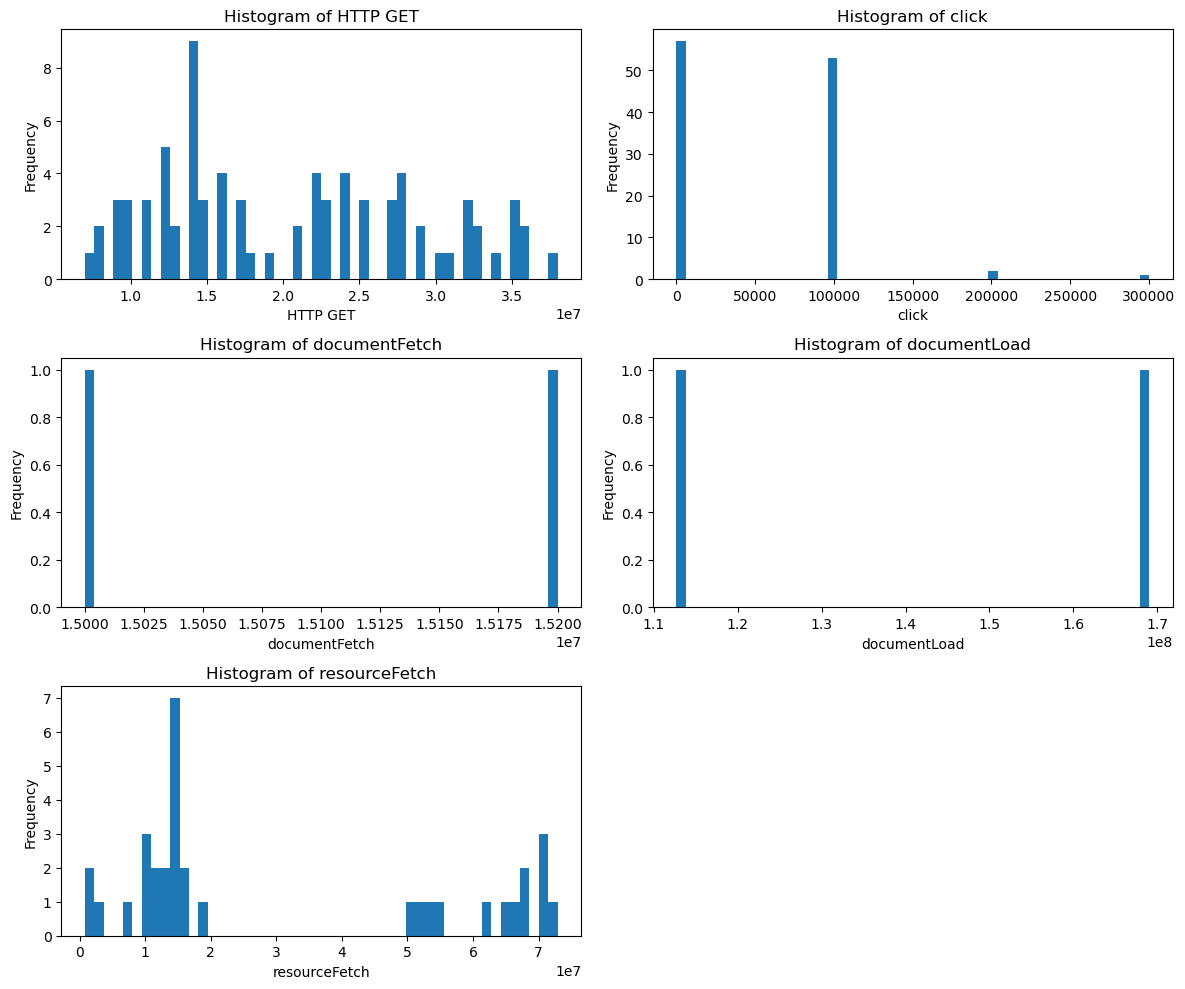

In [133]:
fig, axes = plt.subplots(nrows=len(frontend_web.columns) // 2 + len(frontend_web.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

for i, column in enumerate(frontend_web.columns):
    ax = axes[i]
    ax.hist(frontend_web[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)


for ax in axes[len(frontend_web.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [134]:
set(df[' serviceName'])

{'accountingservice',
 'adservice',
 'cartservice',
 'checkoutservice',
 'currencyservice',
 'emailservice',
 'featureflagservice',
 'frauddetectionservice',
 'frontend',
 'frontend-proxy',
 'frontend-web',
 'loadgenerator',
 'paymentservice',
 'productcatalogservice',
 'quoteservice',
 'recommendationservice',
 'shippingservice'}

In [135]:
loadgenerator=df.query('` serviceName` == "loadgenerator"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
loadgenerator

,,Name,HTTP GET,HTTP POST,All
spanID,parentSpanID,traceID,,,
All,,,2.552385e+11,5.611695e+10,311355447439
e399d5dba0602199,f9825a9c6013e202,0a4c8b2a204f67623bcfbda629a07fc5,2.980832e+09,NaN,2980831627
2da5f946176ae936,f9825a9c6013e202,605b2ed4e56586df16602ef85673fc83,1.980474e+09,NaN,1980473681
af231ec03fdf53f2,f9825a9c6013e202,86d69278c14a4670bb1be847e7ea5184,1.556062e+09,NaN,1556061636
84a19b54e2061b6e,f9825a9c6013e202,7ccb42abf04c59bcf42ae9b992bcbbf9,9.841975e+08,NaN,984197491
...,...,...,...,...,...
b8d65f4aa8b0ad69,b8d65f4aa8b0ad69,9b75cadb0a7bf52f688b4efa3b8d4316,2.156871e+06,NaN,2156871
7e452095eddabab6,6d8e9761b2bdbcbb,2fabd87a8c80c512621f3bed39767d31,2.147815e+06,NaN,2147815
0993cb35c201d67c,bfaa34df6a2eb1d0,7d33a5b5e3f0cd670f53c2e7937fea41,2.143556e+06,NaN,2143556


In [136]:
loadgenerator=loadgenerator.drop('All')
loadgenerator=loadgenerator.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\279854677.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  loadgenerator=loadgenerator.drop('All')


In [137]:
def outliers(col):
    Q1=loadgenerator[col].quantile(0.25)
    Q3=loadgenerator[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    outliers=loadgenerator[(loadgenerator[col]>upper_bound) | (loadgenerator[col]<lower_bound)]
   
    return outliers

In [138]:
outliers('HTTP GET')

,,Name,HTTP GET,HTTP POST
spanID,parentSpanID,traceID,,
e399d5dba0602199,f9825a9c6013e202,0a4c8b2a204f67623bcfbda629a07fc5,2.980832e+09,NaN
2da5f946176ae936,f9825a9c6013e202,605b2ed4e56586df16602ef85673fc83,1.980474e+09,NaN
af231ec03fdf53f2,f9825a9c6013e202,86d69278c14a4670bb1be847e7ea5184,1.556062e+09,NaN
84a19b54e2061b6e,f9825a9c6013e202,7ccb42abf04c59bcf42ae9b992bcbbf9,9.841975e+08,NaN
82e2fb4b2d7869eb,00eda61dd02fb88c,c09ab655c8a375b444464c68b8e5d0f4,2.401067e+08,NaN
...,...,...,...,...
a9f8c325d69371c1,0f35ce12f808696f,bc8dac184f11fe6b8d0eb0a0fa403d8e,4.692654e+07,NaN
55f66e2beb8e151b,2afe8650967168dc,a3af27b9dae7995c77735650a9b78403,4.692383e+07,NaN
85339bf4128ada13,99a72162c7abb246,33acfffcc6a85a6caa98ed7a739c1e8c,4.691209e+07,NaN


In [139]:
outliers('HTTP POST')

,,Name,HTTP GET,HTTP POST
spanID,parentSpanID,traceID,,
a90b8faa2b14904c,8632ede2050258ed,e05754f6b1558aaeeecd1ca6a719eba4,NaN,206102584.0
f4c28470c5ee8288,4166f1f83ec1394c,aae2a48e15a14e4483cb979e95f202f1,NaN,200071932.0
46bb016e09ee583b,99b2a625ac68c78c,c1791f04a1d209f1308d61c39bb083a7,NaN,125836721.0
66bf091061421acc,7f62084606096405,44a8844593a6b1ed5cdd89f1f4931b29,NaN,100233506.0
ace0e04758d4d76d,366648395bc6cc46,27a6aee0998b8755783cd2256eecba9e,NaN,92252215.0
abcb20d21f703881,3353436e8638e176,6e9e4426ca7b7fccd6a010a03ff06e00,NaN,84374509.0
f5e77bc44604f51b,ccddd8f3d03e3d59,653013ddf559afdda95539924585e7f2,NaN,81333215.0
b6e3bd80f2da91dc,6e0a5dafd5fa4d12,a90d580fce4988ac9e03043b36ab0423,NaN,76918725.0
3eb65f43995f8916,f579a5af5fc533db,5db58e3a615c25fc2cc899044e06b3af,NaN,75241170.0


In [140]:
outliers('HTTP GET')

,,Name,HTTP GET,HTTP POST
spanID,parentSpanID,traceID,,
e399d5dba0602199,f9825a9c6013e202,0a4c8b2a204f67623bcfbda629a07fc5,2.980832e+09,NaN
2da5f946176ae936,f9825a9c6013e202,605b2ed4e56586df16602ef85673fc83,1.980474e+09,NaN
af231ec03fdf53f2,f9825a9c6013e202,86d69278c14a4670bb1be847e7ea5184,1.556062e+09,NaN
84a19b54e2061b6e,f9825a9c6013e202,7ccb42abf04c59bcf42ae9b992bcbbf9,9.841975e+08,NaN
82e2fb4b2d7869eb,00eda61dd02fb88c,c09ab655c8a375b444464c68b8e5d0f4,2.401067e+08,NaN
...,...,...,...,...
a9f8c325d69371c1,0f35ce12f808696f,bc8dac184f11fe6b8d0eb0a0fa403d8e,4.692654e+07,NaN
55f66e2beb8e151b,2afe8650967168dc,a3af27b9dae7995c77735650a9b78403,4.692383e+07,NaN
85339bf4128ada13,99a72162c7abb246,33acfffcc6a85a6caa98ed7a739c1e8c,4.691209e+07,NaN


In [141]:
#'paymentservice', 'productcatalogservice','quoteservice','recommendationservice','shippingservice'

In [142]:
paymentservice=df.query('` serviceName` == "paymentservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
paymentservice

,,Name,charge,fs readFileSync,fs realpathSync,fs statSync,grpc.oteldemo.PaymentService/Charge,All
spanID,parentSpanID,traceID,,,,,,
All,,,45431552.0,10272768.0,3723264.0,11736832.0,241789440.0,312953856
f0a2812a2fe004ae,416b80c1fca5d83d,008776a03a8dc10b4fd67aeb86fd7fe7,NaN,NaN,NaN,NaN,2061568.0,2061568
a6e87177cbb6a22c,8e243356d8278970,9ac4ff5a96d08ffc6ed656c5d789d25f,NaN,NaN,NaN,NaN,1736192.0,1736192
8a7dd7c583bfc1f9,58d1574d82d08fc3,e59e34421ff74d232a04ada0086d487b,NaN,NaN,NaN,NaN,1624320.0,1624320
d6836279a6439734,0b4708079d3b4f34,9e7efe4d9ac39241e28adbccad6617aa,NaN,NaN,NaN,NaN,1592576.0,1592576
...,...,...,...,...,...,...,...,...
6070bf4c8c047c09,f9825a9c6013e202,b72022b6ed51a3acf724295aa9965b67,NaN,NaN,NaN,4096.0,NaN,4096
f30ca9bd20f46789,f9825a9c6013e202,0005d7a764e4468834d5eca0ae2459fc,NaN,NaN,NaN,3840.0,NaN,3840
5667e221b4b00df4,f9825a9c6013e202,9ba07ef266d72293f052101af06fb2cd,NaN,NaN,NaN,3840.0,NaN,3840


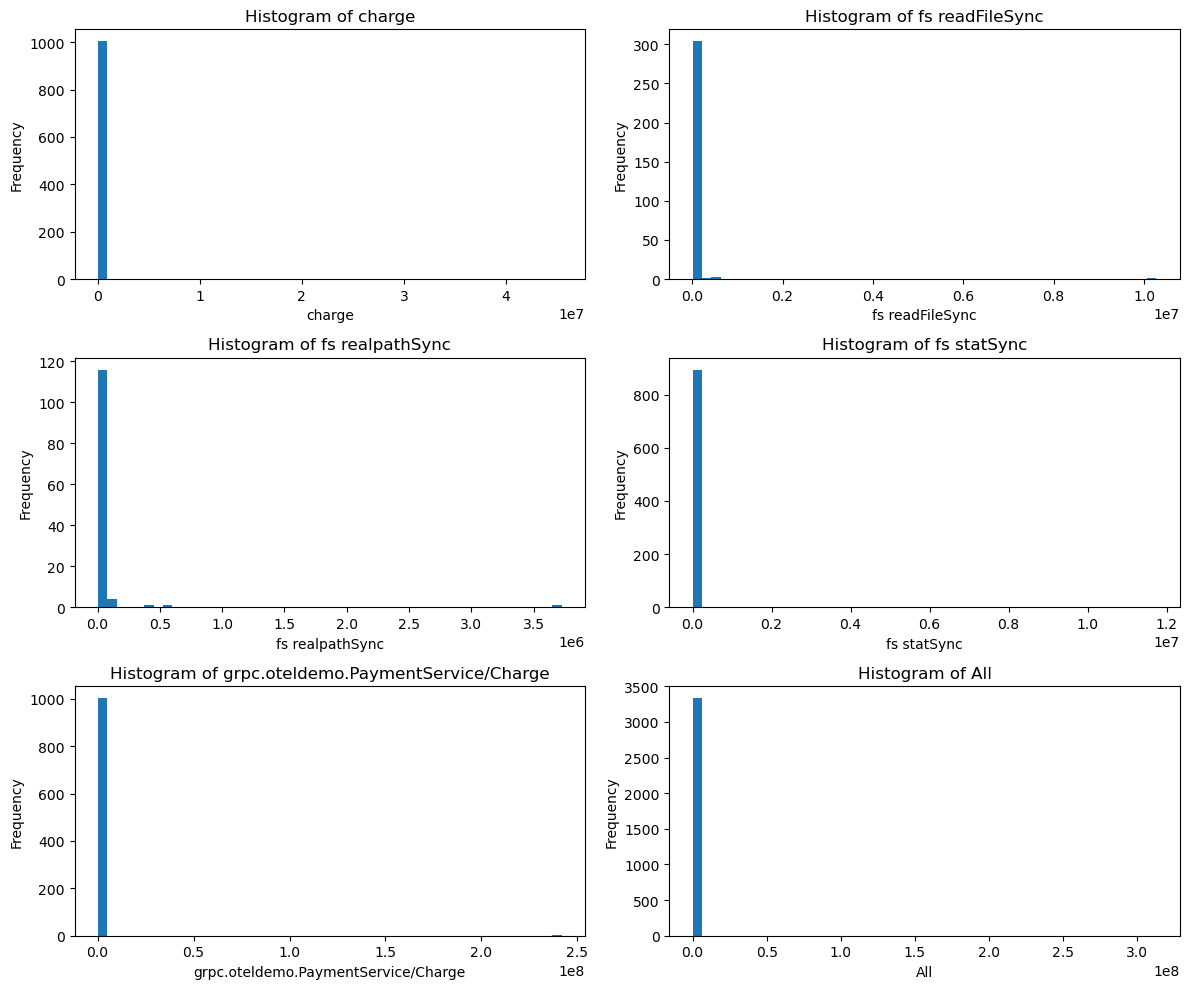

In [143]:
fig, axes = plt.subplots(nrows=len(paymentservice.columns) // 2 + len(paymentservice.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

for i, column in enumerate(paymentservice.columns):
    ax = axes[i]
    ax.hist(paymentservice[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)


for ax in axes[len(paymentservice.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [144]:
paymentservice=paymentservice.drop('All')
paymentservice=paymentservice.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\3972695413.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  paymentservice=paymentservice.drop('All')


In [145]:
product_catalog=df.query('` serviceName` == "productcatalogservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
product_catalog

,,Name,oteldemo.FeatureFlagService/GetFlag,oteldemo.ProductCatalogService/GetProduct,oteldemo.ProductCatalogService/ListProducts,All
spanID,parentSpanID,traceID,,,,
All,,,1.707841e+10,1.792544e+10,27439742.0,35031296346
9c079cb0af7eee25,b45a5769a27932a0,ac3108cb702400af46f4e135465172e1,NaN,3.309366e+07,NaN,33093656
aacb9a44d1901e31,9c079cb0af7eee25,ac3108cb702400af46f4e135465172e1,2.838957e+07,NaN,NaN,28389567
06024bd4e96964d4,d62724b06d65ce6c,7ab78df11921973b037514c18d0bd52e,NaN,2.708602e+07,NaN,27086022
7ebe07191fec168a,06024bd4e96964d4,7ab78df11921973b037514c18d0bd52e,2.655425e+07,NaN,NaN,26554247
...,...,...,...,...,...,...
210f83d3bae1e49d,e65709f4d9f4083d,ffbe6b6a353341c3956500bfb42a6a28,NaN,1.950000e+03,NaN,1950
abd5ce8cf4f73429,ef1f828eedae791b,0dd2e559a36061e29cc83664df91c9c0,NaN,1.940000e+03,NaN,1940
5380edb60a0c1797,a8169c16098f23db,79c47a231abca49a75d0ac2d6b69f408,NaN,1.938000e+03,NaN,1938


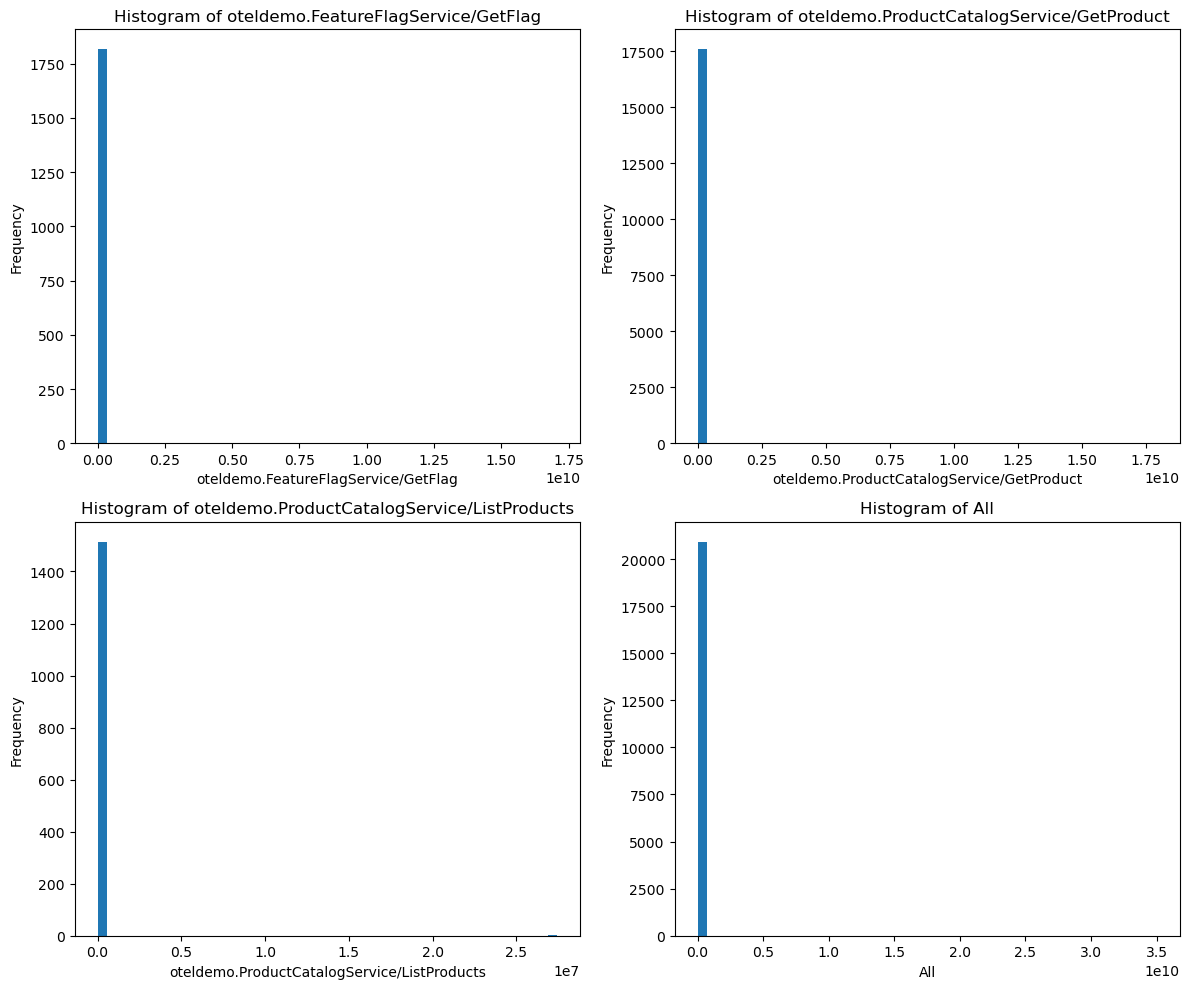

In [146]:
fig, axes = plt.subplots(nrows=len(product_catalog.columns) // 2 + len(product_catalog.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()


for i, column in enumerate(product_catalog.columns):
    ax = axes[i]
    ax.hist(product_catalog[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for ax in axes[len(product_catalog.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [147]:
product_catalog=product_catalog.drop('All')
product_catalog=product_catalog.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2620468549.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  product_catalog=product_catalog.drop('All')


In [148]:
quoteservice=df.query('` serviceName` == "quoteservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
quoteservice

,,Name,POST /getquote,calculate-quote,{closure},All
spanID,parentSpanID,traceID,,,,
All,,,1.022767e+09,5399838.0,938773603.0,1966940242
296e3afe79fd79fa,b2e3d1005da753e5,a4e5ca7b7a09fe1440b1153c651f30bf,1.137291e+07,NaN,NaN,11372909
2fc83b12efe46447,296e3afe79fd79fa,a4e5ca7b7a09fe1440b1153c651f30bf,NaN,NaN,11274698.0,11274698
1693daff336f3e58,d7c4952cfe1793b2,e8ae7fb5dc187a37477f3ae76073d9f6,1.014514e+07,NaN,NaN,10145138
6a2acc78acf0bc2e,1693daff336f3e58,e8ae7fb5dc187a37477f3ae76073d9f6,NaN,NaN,9687212.0,9687212
...,...,...,...,...,...,...
973c2e6a473b4312,3c921d27de074a34,7e316e18b983a843255af9c544847bb0,NaN,4251.0,NaN,4251
737c457b79b3f65e,4e9e2350b156849f,b1ae269ea27092b21cd4041e9ebe1c40,NaN,4226.0,NaN,4226
f09f2a6c23e740e6,38f3b4a8073c5f71,ced74029559d74abc00ac2b6624a97ef,NaN,4211.0,NaN,4211


In [149]:
quoteservice=quoteservice.drop('All')
quoteservice=quoteservice.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\2936399148.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  quoteservice=quoteservice.drop('All')


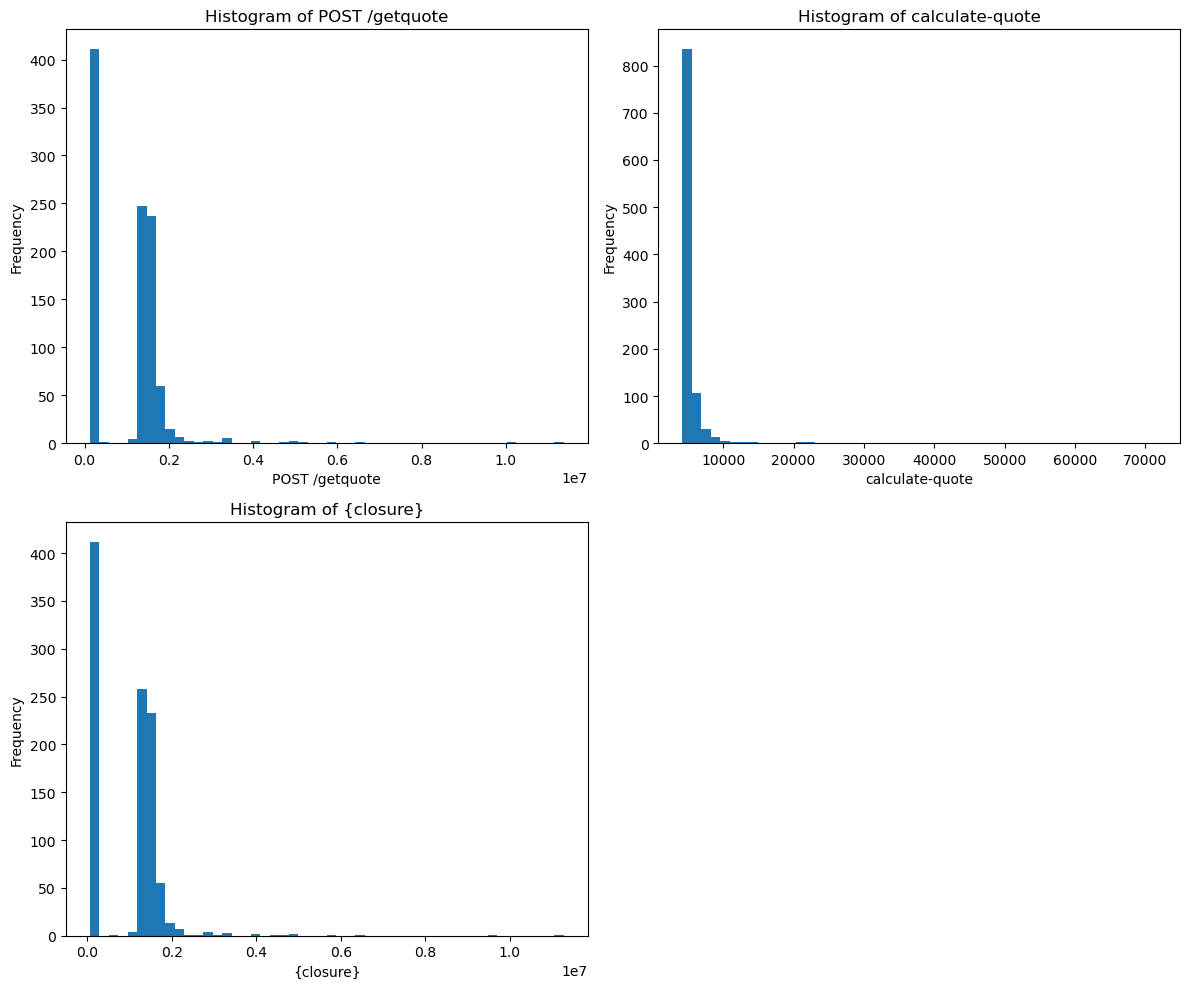

In [150]:
fig, axes = plt.subplots(nrows=len(quoteservice.columns) // 2 + len(quoteservice.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

for i, column in enumerate(quoteservice.columns):
    ax = axes[i]
    ax.hist(quoteservice[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for ax in axes[len(quoteservice.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [151]:
recommendation_service=df.query('` serviceName` == "recommendationservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
recommendation_service=recommendation_service.drop('All')
recommendation_service=recommendation_service.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\1936655672.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  recommendation_service=recommendation_service.drop('All')


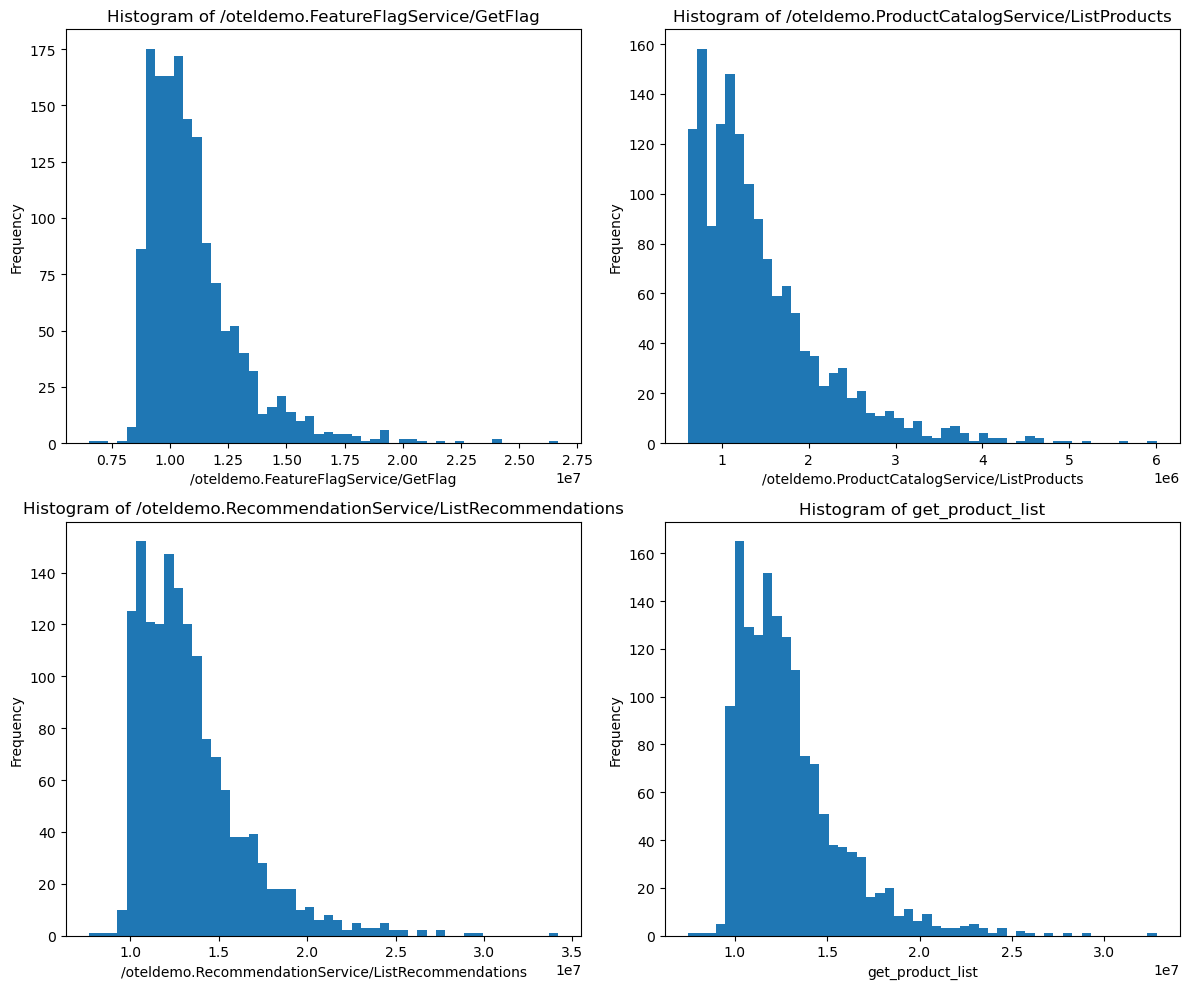

In [152]:
fig, axes = plt.subplots(nrows=len(recommendation_service.columns) // 2 + len(recommendation_service.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(recommendation_service.columns):
    ax = axes[i]
    ax.hist(recommendation_service[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)


for ax in axes[len(recommendation_service.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [153]:
shipping_service=df.query('` serviceName` == "shippingservice"').pivot_table(
     index=[' spanID',' parentSpanID',' traceID'],
     columns=[' Name'],      
    values=' durationNano',     
    aggfunc= 'sum',
     margins=True).sort_values('All', ascending=False)
shipping_service=shipping_service.drop('All')
shipping_service=shipping_service.drop('All',axis=1)

C:\Users\Yudhav\AppData\Local\Temp\ipykernel_15068\1601519224.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  shipping_service=shipping_service.drop('All')


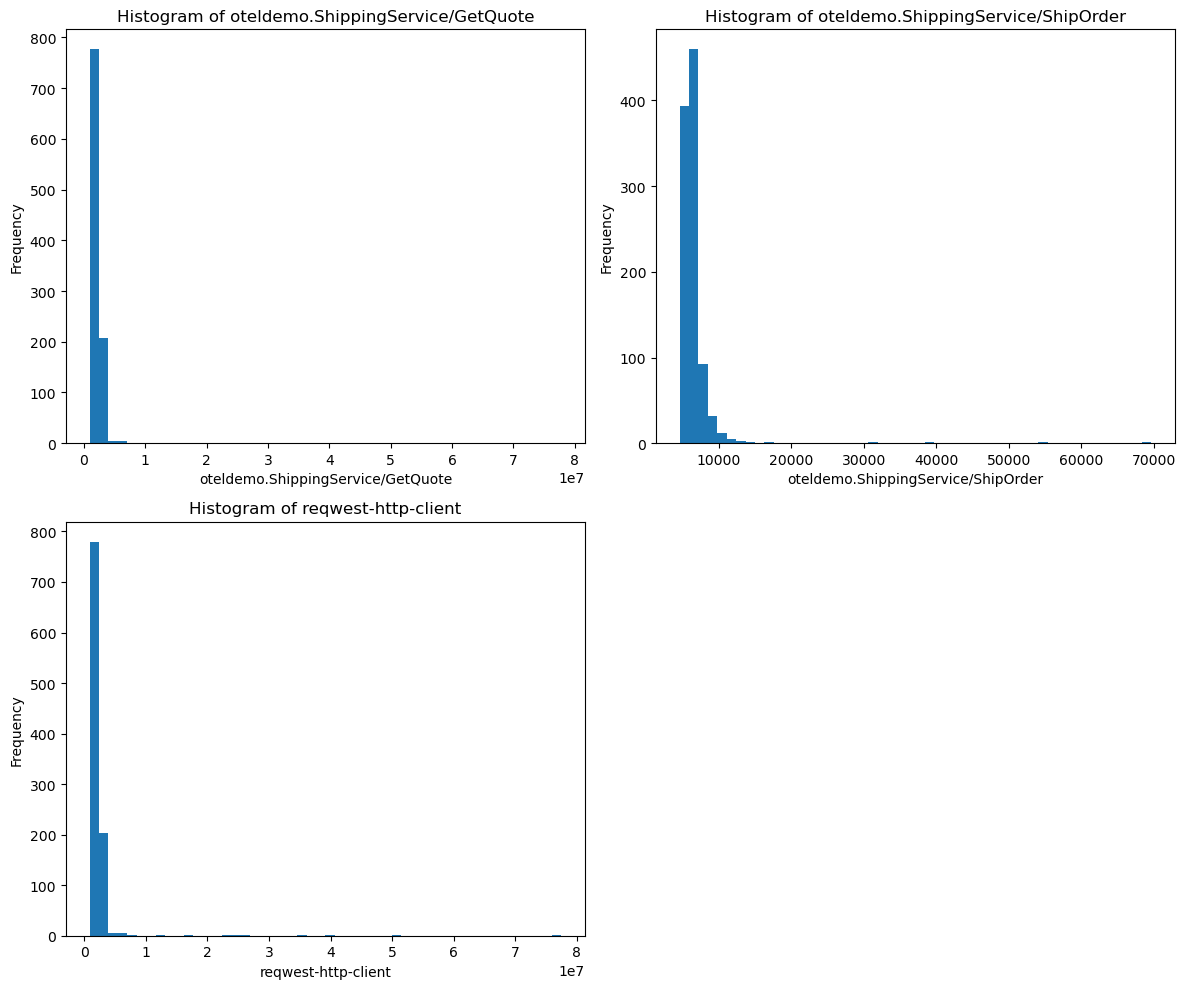

In [154]:
fig, axes = plt.subplots(nrows=len(shipping_service.columns) // 2 + len(shipping_service.columns) % 2, ncols=2, figsize=(12, 10))


axes = axes.flatten()


for i, column in enumerate(shipping_service.columns):
    ax = axes[i]
    ax.hist(shipping_service[column], bins=50)  
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for ax in axes[len(shipping_service.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [173]:
table=pd.pivot_table(df,index=['Timestamp',' parentSpanID'],columns=[' serviceName'],values=[' durationNano'],aggfunc='sum')

In [174]:
table.head(50)# from this table we can obsrve that process are happening in parallel which are causing outliers in the span

durationNano             \
 serviceName                             accountingservice  adservice   
Timestamp                parentSpanID                                   
1900-01-01 00:00:00.500 469559d3c08a3034               NaN        NaN   
                        484d7f68b9421544               NaN        NaN   
                        903d033b67e2e08d               NaN        NaN   
                        ecaa419f9f629191               NaN        NaN   
1900-01-01 00:00:00.600 1bfbcdd22e8eed48               NaN  1346389.0   
                        469559d3c08a3034               NaN        NaN   
                        70e88670dc009a56               NaN        NaN   
                        cc2d391c8116803f               NaN        NaN   
                        f2a3ce3eaede9fc5               NaN   106573.0   
1900-01-01 00:00:01.000 47adbe9eb05452d1               NaN        NaN   
                        b590b2c64665925b               NaN        NaN   
                        e07a1eda6f4cddfb               NaN        NaN   
                        e64122846aa7a5cb               NaN        NaN   
1900-01-01 00:00:01.300 1f38c6874ce7772a               NaN        NaN   
                        47adbe9eb05452d1               NaN        NaN   
                        7ba74ff5bf0037ed               NaN        NaN   
                        ff9c5a7179371f6b               NaN        NaN   
1900-01-01 00:00:01.400 613cdf9f69cd8495               NaN        NaN   
1900-01-01 00:00:01.500 97f664f9832fab14               NaN        NaN   
                        ea16c5f690796d9a               NaN        NaN   
                        f5c5ec9bea831a6c               NaN        NaN   
1900-01-01 00:00:01.600 122f75f341833ac0               NaN        NaN   
                        97f664f9832fab14               NaN        NaN   
                        9d2aed1b3ad49478               NaN        NaN   
                        b53069df6a507f88               NaN        NaN   
1900-01-01 00:00:01.900 00db5049f584857a               NaN        NaN   
                        0970f4c62ff388ff               NaN        NaN   
                        22ed7daf1716d380               NaN        NaN   
                        2f3747cae4527024               NaN        NaN   
                        57d58a8e1bb24ce0               NaN        NaN   
                        5c6997c393672c07               NaN        NaN   
                        6c6119cb48125666               NaN        NaN   
                        6f40d19e59306df5               NaN        NaN   
                        773f9f8bac314812               NaN        NaN   
                        9d2aed1b3ad49478               NaN        NaN   
                        9ebd09a817062035               NaN        NaN   
                        a208372cbaaa23b0               NaN        NaN   
                        b673ffe78162899b               NaN        NaN   
                        e889eab37354e0ce               NaN        NaN   
                        ff9c5a7179371f6b               NaN        NaN   
1900-01-01 00:00:02.000 51acce3110cac2a5               NaN        NaN   
                        543f28cda4e36f49               NaN        NaN   
                        547a6cc9396652e5               NaN        NaN   
                        63a982a8573256b4               NaN        NaN   
                        65beb7cd24687763               NaN        NaN   
                        722dca3f324a397e               NaN        NaN   
                        904210d8bc8c623a               NaN        NaN   
                        92f489faff63dbce               NaN        NaN   
                        ae219cb710ec4caf               NaN        NaN   
                        bf4199768d9936fa               NaN        NaN   

                                                                      \
 serviceName                             cartservice checkoutservice   
Timestamp                parentS

## Anamoly Detection of the span duration

Different reasons may cause performance anomalies in microservice . Any problem in a service, such as a network disconnection or hard disk failure, may cause the microservice system to crash. Misconfigurations or extreme load by a service can also affect the whole system. Changes in one service may influence other dependent services workload, and may result in response time degradation. Moreover, the agile nature of microservice environments yields multiple service updates per day, and several versions of the application may be deployed in a short amount of time. As such, several methods may change in a new update, then affecting the response time behavior of services and leading to many false alarms from monitoring tools

Anomalies in data may happen in various forms, such as point and collective anomalies. Methods that work based on detecting point anomalies and also metric-based algorithms cannot always identify the root cause of anomalies. A single data point (event or metric) does not include enough information to determine whether an anomaly actually happened in complex systems such as microservices. Usually, an anomaly is declared when the execution of the program has not been normal during a time interval that includes many events. In real applications, only a limited number of events can be the result of an action. Therefore, just a few of the possible events can appear as the next events for a sequence of observed events . In other words, similar to words in natural language processing, events as elements of a sequence follow specific patterns and grammar rules. This idea has been used for  anomaly detection framework and applied a general NLP-based strategy to distinguish normal and abnormal patterns in a sequence of  events. 
The proposed diagnostic approach proposed model by collecting sequences of events during spans using the Linux Trace Toolkit Next Generation (LTTng), sending them to the detection module, and eventually analyzing the outputs of the model in Trace Compass. LTTng provides a system software package for correlated tracing of the Linux kernel, applications, and libraries.

Reference :https://journalofcloudcomputing.springeropen.com/articles/10.1186/s13677-022-00296-4

